## IMPORTACIÓN DE LIBRERIAS PROCESAR, LIMPIAR Y TRANSFORMAR LOS DATOS

In [267]:
# Importamos Módulos Requeridos para análisis descriptivo de los datos. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('ggplot')

In [268]:
#importamos las librerias adicionales necesarios para modelamiento de datos como un random forest regressor, se actualizan 
#las funciones más recientes de la libreria sklearn. 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from  sklearn.model_selection import train_test_split
from sklearn.impute  import SimpleImputer
from sklearn import metrics
from scipy.stats import skew

# CARGA DE BASE DE DATOS, DESCRIPCIÓN DE VARIABLESY PRE PROCESAMIENTO DE VARIABLES

In [269]:
#cargamos bases de datos
df1 = pd.read_excel("Volumen_Energia_2009_2022.xlsx")
df2 = pd.read_excel("rpEficaciaConexionServicio.xlsx")

In [270]:
#Vemos la forma y distribución de cada dataset
df1.shape

(143498, 29)

In [271]:
df2.shape

(5248, 8)

In [272]:
df1.head()

,Año,Mes,Id Mes,Id Empresa,Empresa,Tipo Empresa,Id Central,Central,Unidad,Tipo Central,...,Nafta (gal),Gas Natural (kpc),Biogas (mpc),Crudo (gal),Residuo (gal),Bagazo (t),LPG (gal),Observaciones,Energia Entregada Servicio Publico MWh,Energia Entregada Servicio No Publico MWh
0,2009,May,5,60,CELEC-Electroguayas,Generadora,138,Enrique García,TG-5,Térmica,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unidad fuera de servicio,NaN,NaN
1,2009,Jun,6,60,CELEC-Electroguayas,Generadora,138,Enrique García,TG-5,Térmica,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Disponible desde el 16 de junio,"9545,270001","2,809999"
2,2009,Jul,7,60,CELEC-Electroguayas,Generadora,138,Enrique García,TG-5,Térmica,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,"15679,420000","0,610000"
3,2009,Ago,8,60,CELEC-Electroguayas,Generadora,138,Enrique García,TG-5,Térmica,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,"16734,960000","0,450000"
4,2009,May,5,98,CELEC-Hidropaute,Generadora,67,Paute,U1,Hidráulica,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,"54424,348400","0,000000"


In [273]:
df2.head()

,Año,Mes,Id Empresa,Empresa,Indicador,Tipo Area,Valor Indicador,Observaciones
0,2009,Abr,20,CNEL-Bolívar,CSZR,Rural,0.6411,NaN
1,2009,Abr,20,CNEL-Bolívar,CSZU,Urbano,0.5679,NaN
2,2009,Abr,54,CNEL-El Oro,CSZR,Rural,0.9200,NaN
3,2009,Abr,54,CNEL-El Oro,CSZU,Urbano,0.9600,NaN
4,2009,Abr,72,CNEL-Esmeraldas,CSZR,Rural,0.9000,NaN


In [274]:
#se convierten en df1 y df2 los títulos de las columnas para un procesamiento más sencillo y selección de variables. 
df1.rename({'Id Mes':'Id_Mes', 'Id Empresa':'Id_Empresa', 'Tipo Empresa':'Tipo_Empresa', 'Id Central':'Id_Central', 
            'Tipo Central':'Tipo_Central', 'Subtipo Central':'Subtipo_Central', 'Tipo Energia':'Tipo_Energia', 
            'Tipo Servicio':'Tipo_Servicio', 'Energia Bruta (MWh)':'Energia_Bruta_MWh', 
            'Consumo Auxiliares Unidades (MWh)':'Consumo_Auxiliare_ Unidades_MWh', 'Energia Neta (MWh)':'Energia_Neta_MWh', 
            'FUELOIL (gal)':'FUELOIL_gal', 'Diesel2 (gal)':'Diesel2_gal', 'Nafta (gal)':'Nafta_gal', 
            'Gas Natural (kpc)':'Gas_Natural_kpc', 'Biogas (mpc)':'Biogas_mpc', 'Crudo (gal)':'Crudo_gal', 
            'Bagazo (t)':'Bagazo_t', 'LPG (gal)':'LPG_gal', 
            'Energia Entregada Servicio Publico MWh':'Energia_Entregada_Servicio_Publico_MWh', 
            'Energia Entregada Servicio No Publico MWh':'Energia_Entregada_Servicio_No_Publico_MWh'}, axis=1, inplace=True)
df2.rename({'Id Empresa':'Id_Empresa', 'Valor Indicador':'Valor_Indicador'}, axis=1, inplace=True)

# ANÁLISIS EXPLORATORIO DE VARIABLES

In [275]:
df1.head()

,Año,Mes,Id_Mes,Id_Empresa,Empresa,Tipo_Empresa,Id_Central,Central,Unidad,Tipo_Central,...,Nafta_gal,Gas_Natural_kpc,Biogas_mpc,Crudo_gal,Residuo (gal),Bagazo_t,LPG_gal,Observaciones,Energia_Entregada_Servicio_Publico_MWh,Energia_Entregada_Servicio_No_Publico_MWh
0,2009,May,5,60,CELEC-Electroguayas,Generadora,138,Enrique García,TG-5,Térmica,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unidad fuera de servicio,NaN,NaN
1,2009,Jun,6,60,CELEC-Electroguayas,Generadora,138,Enrique García,TG-5,Térmica,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Disponible desde el 16 de junio,"9545,270001","2,809999"
2,2009,Jul,7,60,CELEC-Electroguayas,Generadora,138,Enrique García,TG-5,Térmica,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,"15679,420000","0,610000"
3,2009,Ago,8,60,CELEC-Electroguayas,Generadora,138,Enrique García,TG-5,Térmica,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,"16734,960000","0,450000"
4,2009,May,5,98,CELEC-Hidropaute,Generadora,67,Paute,U1,Hidráulica,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,"54424,348400","0,000000"


In [276]:
df2.head()

,Año,Mes,Id_Empresa,Empresa,Indicador,Tipo Area,Valor_Indicador,Observaciones
0,2009,Abr,20,CNEL-Bolívar,CSZR,Rural,0.6411,NaN
1,2009,Abr,20,CNEL-Bolívar,CSZU,Urbano,0.5679,NaN
2,2009,Abr,54,CNEL-El Oro,CSZR,Rural,0.9200,NaN
3,2009,Abr,54,CNEL-El Oro,CSZU,Urbano,0.9600,NaN
4,2009,Abr,72,CNEL-Esmeraldas,CSZR,Rural,0.9000,NaN


# Descripción de variables DF1

###### Año                               Año calendario
###### Mes                               Mes del Calendario
###### Id_Mes                          Identificador numérico del mes
###### Id_Empresa                 Identificador empresa
###### Empresa                      Nombre empresa
###### Tipo_Empresa            Tipo de empresa (Productora o distribuidora)
###### Id_Central                   Número de identificador de la central
###### Central                        Nombre de la central
###### Unidad                        Número de unidad   
###### Tipo_Central              El tipo de central, método de producción
###### Subtipo_central        Subdivisión tipo de central
###### Tipo_Energia            El tipo de energía que produce (Hidroelectríca, eólica, solar, etc). 
###### Tipo_Servicio           Tipo de servicio
###### Sistema                      El sistema usado para producir energía
###### Energia_Bruta_MW   Enegía bruta producida
###### Consumo_Auxiliare_ Unidades_MWh              El consumo de los generadores internos a la planta
###### Energia_Neta_MWh                         Energía bruta - menos consumo interno en auxiliares de energía (Objetivo de maximización)
###### FUELOIL_gal                                  Consumo de Fuel para producción.
###### Diesel2_gal                                  Consumo de Diesel para la producción
###### Nafta_gal                                    Consumo de nafta para la producción. 
###### Gas_Natural_kpc                      Consumo de gas natural para producción
###### Biogas_mpc                              Consumo de Biogas_mpc para la producción
###### Crudo_gal                                 Consumo de crudo para la producción
###### Residuo (gal)                             Residuo producido al final del proceso. 
###### Bagazo_t                                   Consumo de Bagazo para la producción. 
###### LPG_gal                                     Consumo de LPG para producción
###### Observaciones                          Observaciones de los usuarios
###### Energia_Entregada_Servicio_Publico_MWh       Energía entregada después de la producción al servicio no Público. 
###### Energia_Entregada_Servicio_No_Publico_MWh    Energía entregada después de la producción al servicio Público. 

# Descripción de variables DF2(Adicionales al DF1)

###### Indicador                                El indicador que mide el desempeño de la organización. 
###### Tipo Area                               Si se encuentra en un área rural o urbana. 
##### Valor del indicador               Índice asignado entre 0 y 1, mientras más cercano a uno, mejor es el desempeño

In [277]:
#se detallan las principales estadísticas de ambas bases de datos
df1.describe()

,Año,Id_Mes,Id_Empresa,Id_Central,Energia_Bruta_MWh,Energia_Neta_MWh,FUELOIL_gal,Diesel2_gal,Nafta_gal,Gas_Natural_kpc,Biogas_mpc,Crudo_gal,Residuo (gal),Bagazo_t,LPG_gal
count,143498.000000,143498.000000,143498.000000,143498.000000,143498.000000,143498.000000,1.434980e+05,1.434980e+05,1.434980e+05,143498.000000,143498.000000,1.434980e+05,1.434980e+05,143498.000000,143498.000000
mean,2016.062314,6.521708,191.146385,273.856353,2612.290626,2576.422897,2.183897e+04,1.637223e+04,2.933882e+02,2030.818795,1068.447967,8.824841e+03,3.230037e+03,128.752640,669.577450
std,3.932937,3.451817,116.219391,171.906361,10002.844257,9894.884137,2.468647e+05,1.154615e+05,2.952810e+04,20896.431861,20944.041261,4.283817e+04,3.288831e+04,2413.345492,14026.926754
min,2009.000000,1.000000,7.000000,3.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,2013.000000,4.000000,94.000000,123.000000,11.051500,10.891500,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,2016.000000,7.000000,198.000000,298.000000,200.400000,198.908502,0.000000e+00,1.050000e+01,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
75%,2019.000000,10.000000,274.000000,398.000000,676.580416,665.449857,0.000000e+00,1.135117e+04,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
max,2022.000000,12.000000,607.000000,620.000000,405420.857183,405420.857183,5.977915e+06,6.233316e+06,4.902689e+06,660000.000000,628145.130000,1.822235e+06,3.283604e+06,132237.520000,393681.660000


In [278]:
df2.describe()

,Año,Id_Empresa,Valor_Indicador
count,5248.000000,5248.000000,5248.000000
mean,2013.578125,105.611280,0.734885
std,2.956001,65.792698,0.310852
min,2009.000000,11.000000,0.000000
25%,2011.000000,35.000000,0.600000
50%,2013.000000,130.000000,0.875000
75%,2016.000000,174.000000,0.968869
max,2019.000000,193.000000,1.000000


In [279]:
#Se definen las columnas criterio. 
columnas_criterio = ['Id_Empresa', 'Año', 'Mes', 'Empresa']

In [280]:
#reemplazo caracteres en columnas con separadores de decimlaes incorrectos
df1['Energia_Entregada_Servicio_Publico_MWh'] = df1['Energia_Entregada_Servicio_Publico_MWh'].str.replace(',', '.')
df1['Energia_Entregada_Servicio_No_Publico_MWh'] = df1['Energia_Entregada_Servicio_No_Publico_MWh'].str.replace(',', '.')
df1['Consumo_Auxiliare_ Unidades_MWh'] = df1['Consumo_Auxiliare_ Unidades_MWh'].str.replace(',', '.')
df1.head()

,Año,Mes,Id_Mes,Id_Empresa,Empresa,Tipo_Empresa,Id_Central,Central,Unidad,Tipo_Central,...,Nafta_gal,Gas_Natural_kpc,Biogas_mpc,Crudo_gal,Residuo (gal),Bagazo_t,LPG_gal,Observaciones,Energia_Entregada_Servicio_Publico_MWh,Energia_Entregada_Servicio_No_Publico_MWh
0,2009,May,5,60,CELEC-Electroguayas,Generadora,138,Enrique García,TG-5,Térmica,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unidad fuera de servicio,NaN,NaN
1,2009,Jun,6,60,CELEC-Electroguayas,Generadora,138,Enrique García,TG-5,Térmica,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Disponible desde el 16 de junio,9545.270001,2.809999
2,2009,Jul,7,60,CELEC-Electroguayas,Generadora,138,Enrique García,TG-5,Térmica,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,15679.420000,0.610000
3,2009,Ago,8,60,CELEC-Electroguayas,Generadora,138,Enrique García,TG-5,Térmica,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-,16734.960000,0.450000
4,2009,May,5,98,CELEC-Hidropaute,Generadora,67,Paute,U1,Hidráulica,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,54424.348400,0.000000


In [281]:
#se transforman variables a numéricas que se observan vienen como objetos. 
df1['Consumo_Auxiliare_ Unidades_MWh'] = pd.to_numeric(df1['Consumo_Auxiliare_ Unidades_MWh'], errors='coerce')
df1['Energia_Entregada_Servicio_Publico_MWh'] = pd.to_numeric(df1['Energia_Entregada_Servicio_Publico_MWh'], errors='coerce')
df1['Energia_Entregada_Servicio_No_Publico_MWh'] = pd.to_numeric(df1['Energia_Entregada_Servicio_No_Publico_MWh'], errors='coerce')
df1.dtypes

Año                                            int64
Mes                                           object
Id_Mes                                         int64
Id_Empresa                                     int64
Empresa                                       object
Tipo_Empresa                                  object
Id_Central                                     int64
Central                                       object
Unidad                                        object
Tipo_Central                                  object
Subtipo_Central                               object
Tipo_Energia                                  object
Tipo_Servicio                                 object
Sistema                                       object
Energia_Bruta_MWh                            float64
Consumo_Auxiliare_ Unidades_MWh              float64
Energia_Neta_MWh                             float64
FUELOIL_gal                                  float64
Diesel2_gal                                  f

In [282]:
#combino las bases para el análisis del indicador. 
df3 = pd.merge(df1, df2, on=columnas_criterio, how='inner')
df3.head()

,Año,Mes,Id_Mes,Id_Empresa,Empresa,Tipo_Empresa,Id_Central,Central,Unidad,Tipo_Central,...,Residuo (gal),Bagazo_t,LPG_gal,Observaciones_x,Energia_Entregada_Servicio_Publico_MWh,Energia_Entregada_Servicio_No_Publico_MWh,Indicador,Tipo Area,Valor_Indicador,Observaciones_y
0,2009,Ene,1,54,CNEL-El Oro,Distribuidora,151,Costa Rica,Deutz,Térmica,...,0.0,0.0,0.0,"Operativo, de Emergencia.",3.1135,0.0,CSZR,Rural,0.99038,NaN
1,2009,Ene,1,54,CNEL-El Oro,Distribuidora,151,Costa Rica,Deutz,Térmica,...,0.0,0.0,0.0,"Operativo, de Emergencia.",3.1135,0.0,CSZU,Urbano,0.90476,NaN
2,2009,Ene,1,54,CNEL-El Oro,Distribuidora,151,Costa Rica,Perkins 1104A-44TG2,Térmica,...,0.0,0.0,0.0,"Min. 18,00 Kw; Max. 29,40 Kw. Consumo de aux. ...",3.1135,0.0,CSZR,Rural,0.99038,NaN
3,2009,Ene,1,54,CNEL-El Oro,Distribuidora,151,Costa Rica,Perkins 1104A-44TG2,Térmica,...,0.0,0.0,0.0,"Min. 18,00 Kw; Max. 29,40 Kw. Consumo de aux. ...",3.1135,0.0,CSZU,Urbano,0.90476,NaN
4,2009,Ene,1,54,CNEL-El Oro,Distribuidora,90,Machala,G. M. #4,Térmica,...,0.0,0.0,0.0,Min. 1990 Kw; Max. 2020 Kw. Consumo de aux. im...,96.0220,0.0,CSZR,Rural,0.99038,NaN


In [283]:
#Características nuevo dataframe
df3.shape

(26732, 33)

In [284]:
df1.describe()

,Año,Id_Mes,Id_Empresa,Id_Central,Energia_Bruta_MWh,Consumo_Auxiliare_ Unidades_MWh,Energia_Neta_MWh,FUELOIL_gal,Diesel2_gal,Nafta_gal,Gas_Natural_kpc,Biogas_mpc,Crudo_gal,Residuo (gal),Bagazo_t,LPG_gal,Energia_Entregada_Servicio_Publico_MWh,Energia_Entregada_Servicio_No_Publico_MWh
count,143498.000000,143498.000000,143498.000000,143498.000000,143498.000000,96460.000000,143498.000000,1.434980e+05,1.434980e+05,1.434980e+05,143498.000000,143498.000000,1.434980e+05,1.434980e+05,143498.000000,143498.000000,133803.000000,133803.000000
mean,2016.062314,6.521708,191.146385,273.856353,2612.290626,53.358360,2576.422897,2.183897e+04,1.637223e+04,2.933882e+02,2030.818795,1068.447967,8.824841e+03,3.230037e+03,128.752640,669.577450,2332.090785,428.141883
std,3.932937,3.451817,116.219391,171.906361,10002.844257,309.504391,9894.884137,2.468647e+05,1.154615e+05,2.952810e+04,20896.431861,20944.041261,4.283817e+04,3.288831e+04,2413.345492,14026.926754,9815.679710,1045.019902
min,2009.000000,1.000000,7.000000,3.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,4.000000,94.000000,123.000000,11.051500,0.000000,10.891500,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,7.000000,198.000000,298.000000,200.400000,0.700000,198.908502,0.000000e+00,1.050000e+01,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,122.465043
75%,2019.000000,10.000000,274.000000,398.000000,676.580416,19.226780,665.449857,0.000000e+00,1.135117e+04,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,169.371501,344.542597
max,2022.000000,12.000000,607.000000,620.000000,405420.857183,9207.296325,405420.857183,5.977915e+06,6.233316e+06,4.902689e+06,660000.000000,628145.130000,1.822235e+06,3.283604e+06,132237.520000,393681.660000,405420.857183,57589.400000


In [285]:
df3.describe()

,Año,Id_Mes,Id_Empresa,Id_Central,Energia_Bruta_MWh,Consumo_Auxiliare_ Unidades_MWh,Energia_Neta_MWh,FUELOIL_gal,Diesel2_gal,Nafta_gal,Gas_Natural_kpc,Biogas_mpc,Crudo_gal,Residuo (gal),Bagazo_t,LPG_gal,Energia_Entregada_Servicio_Publico_MWh,Energia_Entregada_Servicio_No_Publico_MWh,Valor_Indicador
count,26732.000000,26732.000000,26732.000000,26732.000000,26732.000000,22030.000000,26732.000000,2.673200e+04,2.673200e+04,26732.0,26732.0,26732.0,26732.000000,26732.000000,26732.0,26732.0,25048.000000,25048.0,26732.000000
mean,2013.294703,6.316175,118.902439,144.084693,732.460599,9.100609,724.960733,7.911596e+03,7.950150e+03,0.0,0.0,0.0,353.065682,106.532695,0.0,0.0,773.366447,0.0,0.833207
std,2.986285,3.500026,65.502838,93.549736,1494.694607,35.836436,1476.548170,5.547024e+04,6.397111e+04,0.0,0.0,0.0,7069.646192,4389.979459,0.0,0.0,1332.204748,0.0,0.227615
min,2009.000000,1.000000,11.000000,9.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000017,0.0,0.000000
25%,2011.000000,3.000000,81.000000,95.000000,0.618000,0.000000,0.580000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,73.524000,0.0,0.793100
50%,2013.000000,6.000000,142.000000,133.000000,155.276500,0.300000,154.514636,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,263.619675,0.0,0.919844
75%,2016.000000,9.000000,174.000000,163.000000,787.672886,2.683705,777.622994,0.000000e+00,5.463670e+02,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,951.598857,0.0,0.982196
max,2019.000000,12.000000,193.000000,584.000000,26187.693797,897.550935,25877.035660,1.582078e+06,1.913923e+06,0.0,0.0,0.0,214904.000000,216891.900000,0.0,0.0,20107.388203,0.0,1.000000


In [286]:
#Se eliminan variables que no tienen observaciones, es decir si valor es de cero en el nuevo conjunto de datos.

df3 = df3.drop(['Nafta_gal', 'Gas_Natural_kpc', 'Biogas_mpc','Bagazo_t', 'LPG_gal', 'Energia_Entregada_Servicio_No_Publico_MWh'], axis=1)
df3.head()

,Año,Mes,Id_Mes,Id_Empresa,Empresa,Tipo_Empresa,Id_Central,Central,Unidad,Tipo_Central,...,FUELOIL_gal,Diesel2_gal,Crudo_gal,Residuo (gal),Observaciones_x,Energia_Entregada_Servicio_Publico_MWh,Indicador,Tipo Area,Valor_Indicador,Observaciones_y
0,2009,Ene,1,54,CNEL-El Oro,Distribuidora,151,Costa Rica,Deutz,Térmica,...,0.0,0.0,0.0,0.0,"Operativo, de Emergencia.",3.1135,CSZR,Rural,0.99038,NaN
1,2009,Ene,1,54,CNEL-El Oro,Distribuidora,151,Costa Rica,Deutz,Térmica,...,0.0,0.0,0.0,0.0,"Operativo, de Emergencia.",3.1135,CSZU,Urbano,0.90476,NaN
2,2009,Ene,1,54,CNEL-El Oro,Distribuidora,151,Costa Rica,Perkins 1104A-44TG2,Térmica,...,0.0,695.5,0.0,0.0,"Min. 18,00 Kw; Max. 29,40 Kw. Consumo de aux. ...",3.1135,CSZR,Rural,0.99038,NaN
3,2009,Ene,1,54,CNEL-El Oro,Distribuidora,151,Costa Rica,Perkins 1104A-44TG2,Térmica,...,0.0,695.5,0.0,0.0,"Min. 18,00 Kw; Max. 29,40 Kw. Consumo de aux. ...",3.1135,CSZU,Urbano,0.90476,NaN
4,2009,Ene,1,54,CNEL-El Oro,Distribuidora,90,Machala,G. M. #4,Térmica,...,0.0,6298.0,0.0,0.0,Min. 1990 Kw; Max. 2020 Kw. Consumo de aux. im...,96.0220,CSZR,Rural,0.99038,NaN


In [287]:
#valoramos si existen valores perdidos en columnas. De aquí los data frames a usar serían df1 y df3 
df1.isna().sum()

Año                                               0
Mes                                               0
Id_Mes                                            0
Id_Empresa                                        0
Empresa                                           0
Tipo_Empresa                                      0
Id_Central                                        0
Central                                           0
Unidad                                            0
Tipo_Central                                      0
Subtipo_Central                                   0
Tipo_Energia                                      0
Tipo_Servicio                                     0
Sistema                                           0
Energia_Bruta_MWh                                 0
Consumo_Auxiliare_ Unidades_MWh               47038
Energia_Neta_MWh                                  0
FUELOIL_gal                                       0
Diesel2_gal                                       0
Nafta_gal   

In [288]:
df3.isna().sum()

Año                                           0
Mes                                           0
Id_Mes                                        0
Id_Empresa                                    0
Empresa                                       0
Tipo_Empresa                                  0
Id_Central                                    0
Central                                       0
Unidad                                        0
Tipo_Central                                  0
Subtipo_Central                               0
Tipo_Energia                                  0
Tipo_Servicio                                 0
Sistema                                       0
Energia_Bruta_MWh                             0
Consumo_Auxiliare_ Unidades_MWh            4702
Energia_Neta_MWh                              0
FUELOIL_gal                                   0
Diesel2_gal                                   0
Crudo_gal                                     0
Residuo (gal)                           

In [289]:
#la columna de observaciones no se va a usar en el análisis para ninguno de los modelos, por tanto se procede a retirarla. 
df1 = df1.drop("Observaciones", axis =1)
df1.isna().sum()

Año                                              0
Mes                                              0
Id_Mes                                           0
Id_Empresa                                       0
Empresa                                          0
Tipo_Empresa                                     0
Id_Central                                       0
Central                                          0
Unidad                                           0
Tipo_Central                                     0
Subtipo_Central                                  0
Tipo_Energia                                     0
Tipo_Servicio                                    0
Sistema                                          0
Energia_Bruta_MWh                                0
Consumo_Auxiliare_ Unidades_MWh              47038
Energia_Neta_MWh                                 0
FUELOIL_gal                                      0
Diesel2_gal                                      0
Nafta_gal                      

In [290]:
df3 = df3.drop("Observaciones_x", axis =1)
df3 = df3.drop("Observaciones_y", axis =1)
df3.isna().sum()

Año                                          0
Mes                                          0
Id_Mes                                       0
Id_Empresa                                   0
Empresa                                      0
Tipo_Empresa                                 0
Id_Central                                   0
Central                                      0
Unidad                                       0
Tipo_Central                                 0
Subtipo_Central                              0
Tipo_Energia                                 0
Tipo_Servicio                                0
Sistema                                      0
Energia_Bruta_MWh                            0
Consumo_Auxiliare_ Unidades_MWh           4702
Energia_Neta_MWh                             0
FUELOIL_gal                                  0
Diesel2_gal                                  0
Crudo_gal                                    0
Residuo (gal)                                0
Energia_Entre

In [291]:
#se procede a reemplazar los valores nulos por cero, dado que lo mismo refleja en el diccionario de datos. 
df1 = df1.fillna(0)
df3 = df3.fillna(0)

In [292]:
df1.isna().sum()

Año                                          0
Mes                                          0
Id_Mes                                       0
Id_Empresa                                   0
Empresa                                      0
Tipo_Empresa                                 0
Id_Central                                   0
Central                                      0
Unidad                                       0
Tipo_Central                                 0
Subtipo_Central                              0
Tipo_Energia                                 0
Tipo_Servicio                                0
Sistema                                      0
Energia_Bruta_MWh                            0
Consumo_Auxiliare_ Unidades_MWh              0
Energia_Neta_MWh                             0
FUELOIL_gal                                  0
Diesel2_gal                                  0
Nafta_gal                                    0
Gas_Natural_kpc                              0
Biogas_mpc   

In [293]:
df3.isna().sum()

Año                                       0
Mes                                       0
Id_Mes                                    0
Id_Empresa                                0
Empresa                                   0
Tipo_Empresa                              0
Id_Central                                0
Central                                   0
Unidad                                    0
Tipo_Central                              0
Subtipo_Central                           0
Tipo_Energia                              0
Tipo_Servicio                             0
Sistema                                   0
Energia_Bruta_MWh                         0
Consumo_Auxiliare_ Unidades_MWh           0
Energia_Neta_MWh                          0
FUELOIL_gal                               0
Diesel2_gal                               0
Crudo_gal                                 0
Residuo (gal)                             0
Energia_Entregada_Servicio_Publico_MWh    0
Indicador                       

In [294]:
df1.dtypes

Año                                            int64
Mes                                           object
Id_Mes                                         int64
Id_Empresa                                     int64
Empresa                                       object
Tipo_Empresa                                  object
Id_Central                                     int64
Central                                       object
Unidad                                        object
Tipo_Central                                  object
Subtipo_Central                               object
Tipo_Energia                                  object
Tipo_Servicio                                 object
Sistema                                       object
Energia_Bruta_MWh                            float64
Consumo_Auxiliare_ Unidades_MWh              float64
Energia_Neta_MWh                             float64
FUELOIL_gal                                  float64
Diesel2_gal                                  f

In [295]:
df3.dtypes

Año                                         int64
Mes                                        object
Id_Mes                                      int64
Id_Empresa                                  int64
Empresa                                    object
Tipo_Empresa                               object
Id_Central                                  int64
Central                                    object
Unidad                                     object
Tipo_Central                               object
Subtipo_Central                            object
Tipo_Energia                               object
Tipo_Servicio                              object
Sistema                                    object
Energia_Bruta_MWh                         float64
Consumo_Auxiliare_ Unidades_MWh           float64
Energia_Neta_MWh                          float64
FUELOIL_gal                               float64
Diesel2_gal                               float64
Crudo_gal                                 float64


# VISUALIZACIÓN DE VARIABLES CONTINUAS Y CATEGÓRICAS MODELO 1

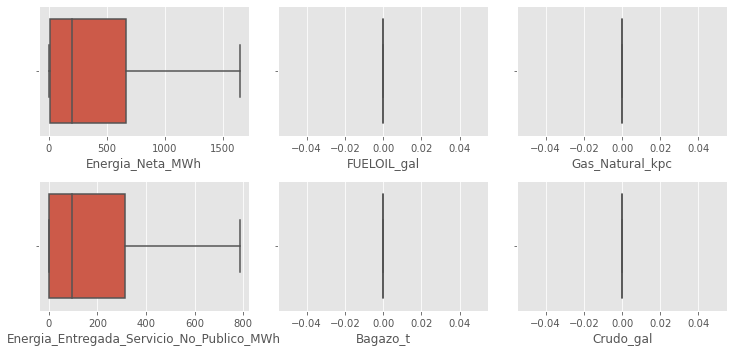

In [302]:
# se obtienen box plots con la finalidad de bucar outliers y validar en caso de que sea necersario eliminar 
#alguna variable del análisis df1 variables categóricas. Las principales para explicar en el modelo. 

fig, axs = plt.subplots(2,3, figsize = (10,5))

plt1 = sns.boxplot(df1['Energia_Neta_MWh'], ax = axs[0,0], showfliers=False)
plt2 = sns.boxplot(df1['FUELOIL_gal'], ax = axs[0,1], showfliers=False)
plt3 = sns.boxplot(df1['Gas_Natural_kpc'], ax = axs[0,2], showfliers=False)
plt1 = sns.boxplot(df1['Energia_Entregada_Servicio_No_Publico_MWh'], ax = axs[1,0], showfliers=False)
plt2 = sns.boxplot(df1['Bagazo_t'], ax = axs[1,1], showfliers=False)
plt3 = sns.boxplot(df1['Crudo_gal'], ax = axs[1,2], showfliers=False)



plt.tight_layout()

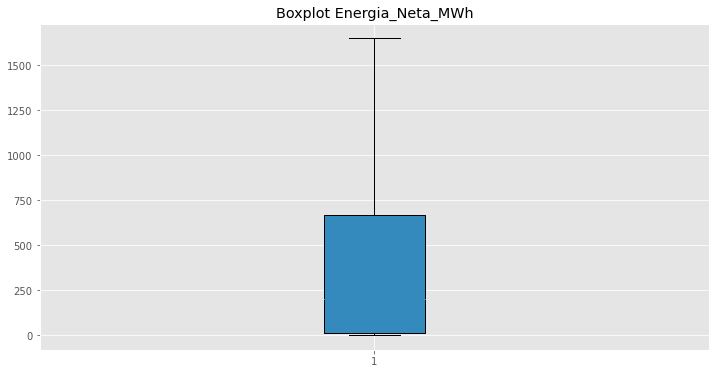

In [297]:
#Revisamos variable por variable la distribución en cajas
plt.figure(figsize=(12,6))
plt.boxplot(df1['Energia_Neta_MWh'], showfliers=False, patch_artist=True)
plt.title('Boxplot Energia_Neta_MWh')
plt.show()

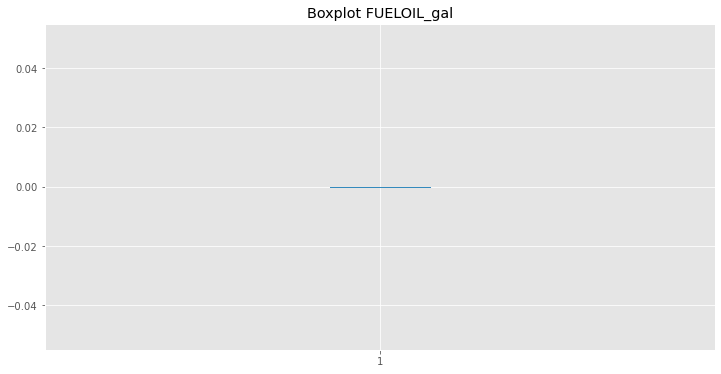

In [301]:
#Revisamos variable por variable la distribución en cajas
plt.figure(figsize=(12,6))
plt.boxplot(df1['FUELOIL_gal'],  showfliers=False, patch_artist=True)
plt.title('Boxplot FUELOIL_gal')
plt.show()

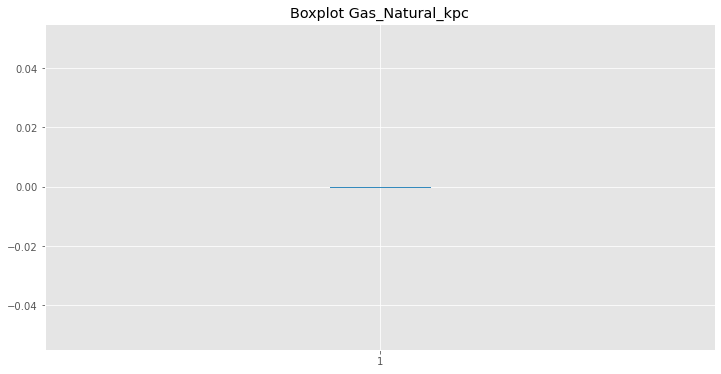

In [303]:
#Revisamos variable por variable la distribución en cajas
plt.figure(figsize=(12,6))
plt.boxplot(df1['Gas_Natural_kpc'], showfliers=False, patch_artist=True)
plt.title('Boxplot Gas_Natural_kpc')
plt.show()

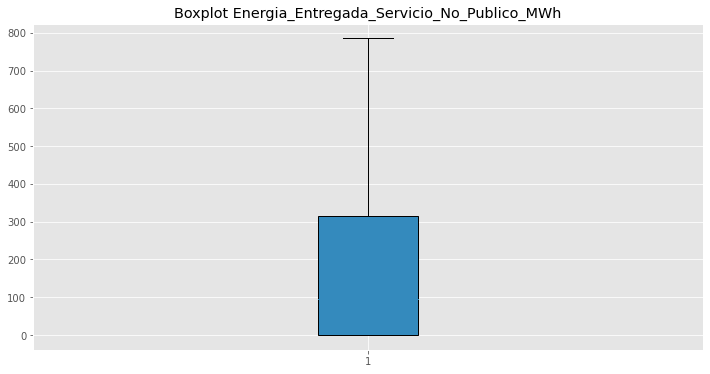

In [304]:
#Revisamos variable por variable la distribución en cajas
plt.figure(figsize=(12,6))
plt.boxplot(df1['Energia_Entregada_Servicio_No_Publico_MWh'], showfliers=False, patch_artist=True)
plt.title('Boxplot Energia_Entregada_Servicio_No_Publico_MWh')
plt.show()

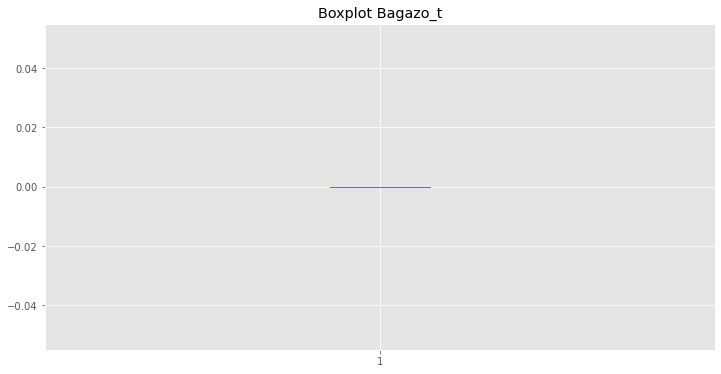

In [305]:
#Revisamos variable por variable la distribución en cajas
plt.figure(figsize=(12,6))
plt.boxplot(df1['Bagazo_t'], showfliers=False, patch_artist=True)
plt.title('Boxplot Bagazo_t')
plt.show()

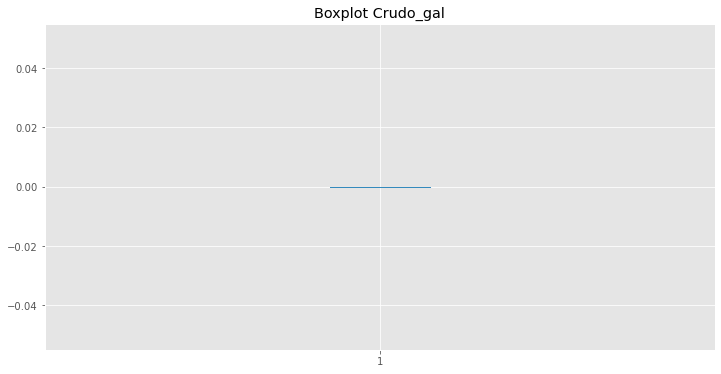

In [306]:
#Revisamos variable por variable la distribución en cajas
plt.figure(figsize=(12,6))
plt.boxplot(df1['Crudo_gal'], showfliers=False, patch_artist=True)
plt.title('Boxplot Crudo_gal')
plt.show()

# CREAMOS GRÁFICOS DE DENSIDAD PARA CADA UNA DE LAS VARIABLES QUE MÁS EXPLICAN EN EL MODELO

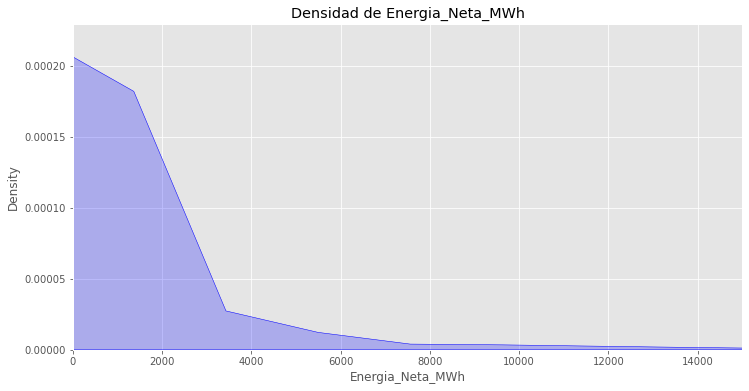

In [37]:
#Vamos a observar como es la distribución de las variables objetivo en cada uno de las dataframe
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=df1, x = 'Energia_Neta_MWh',ax=ax, color = "blue", shade = "True")
ax.set_title('Densidad de Energia_Neta_MWh')
plt.xlim(0, 15000)
plt.show()

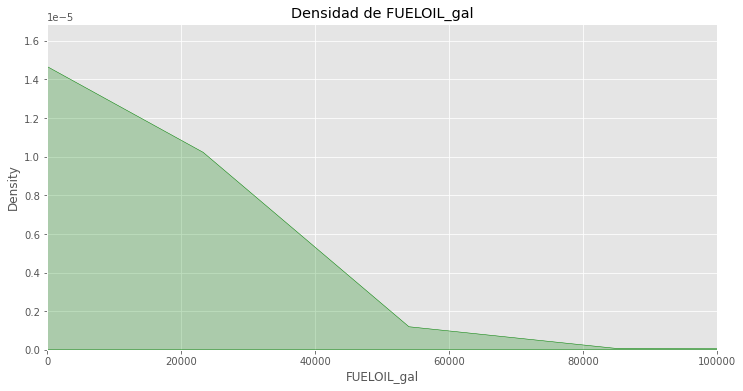

In [38]:
#Vamos a observar como es la distribución de las variables objetivo en cada uno de las dataframe
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=df1, x = 'FUELOIL_gal',ax=ax, color = "green", shade = "True")
ax.set_title('Densidad de FUELOIL_gal')
plt.xlim(0, 100000)
plt.show()

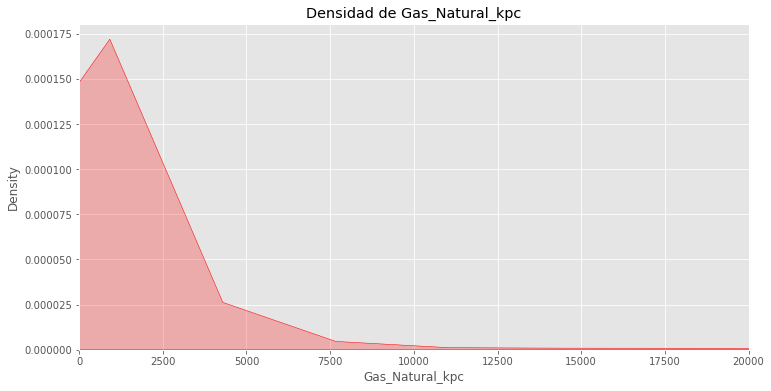

In [39]:
#Vamos a observar como es la distribución de las variables objetivo en cada uno de las dataframe
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=df1, x = 'Gas_Natural_kpc',ax=ax, color = "red", shade = "True")
ax.set_title('Densidad de Gas_Natural_kpc')

plt.xlim(0, 20000)

plt.show()

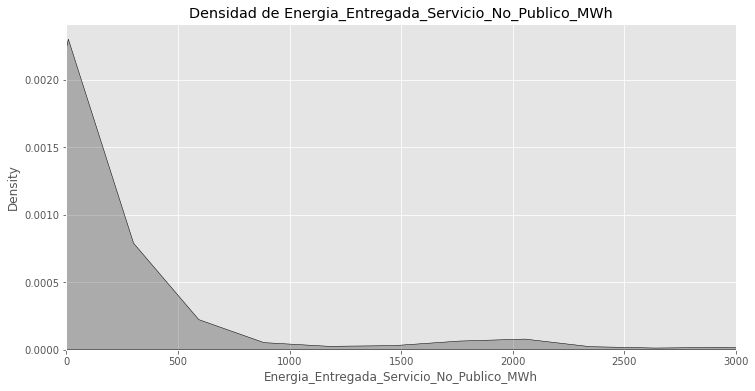

In [40]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=df1, x = 'Energia_Entregada_Servicio_No_Publico_MWh',ax=ax, color = "black", shade = "True")
ax.set_title('Densidad de Energia_Entregada_Servicio_No_Publico_MWh')
plt.xlim(0, 3000)
plt.show()

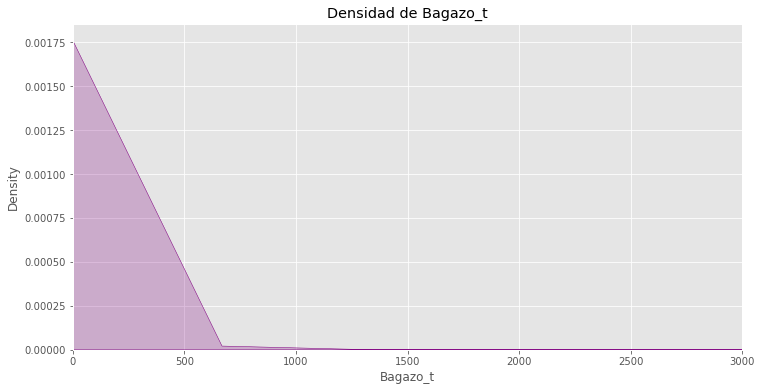

In [41]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=df1, x = 'Bagazo_t',ax=ax, color = "purple", shade = "True")
ax.set_title('Densidad de Bagazo_t')
plt.xlim(0, 3000)

plt.show()

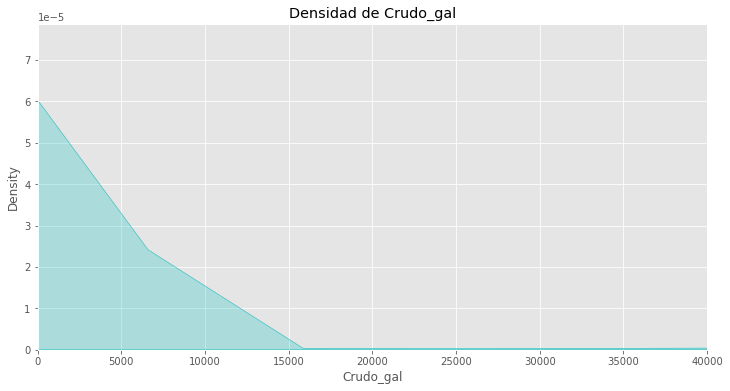

In [42]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=df1, x = 'Crudo_gal',ax=ax, color = "c", shade = "True")
ax.set_title('Densidad de Crudo_gal')
plt.xlim(0, 40000)

plt.show()

# VARIABLES CATEGÓRICAS, SE TRAZAN GRÁFICAS BARRAS PARA MEDIR LA DISTRIBUCIÓN Y ACUMULACIÓN DE OBSERVACIONES

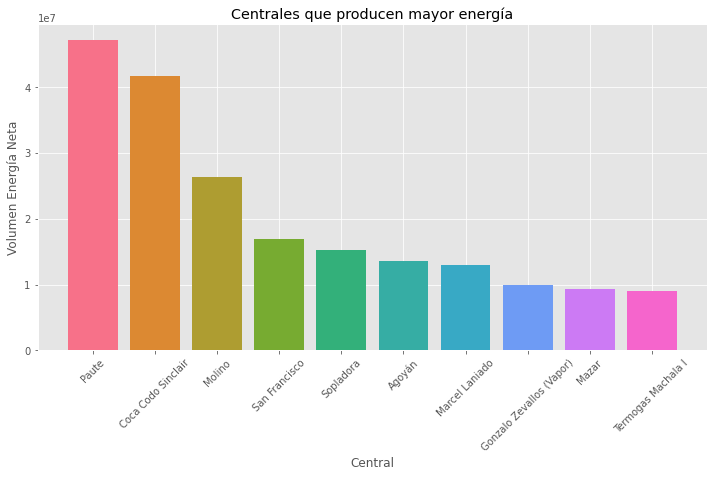

In [43]:
#Gráficamos las principales variables cateóricas por aquellas que producen el mayor nivel de energía. Al tener muchas partidas, 
#se toman en cuenta únicamente las 10 centrales que más producen

#columnas_categoricas = ['Central', 'Tipo_Empresa', 'Unidad', 'Tipo_Central', 'Subtipo_central', 'Tipo_Energia']
#dependiente = Energia_Neta_MWh

#Agrupamos incialmente las columnas por la variable categórica. El volumen de energía neto. 

produccion_por_central = df1.groupby('Central')['Energia_Neta_MWh'].sum().sort_values(ascending=False)

#seleccinamos las 10 principales clumnas. 

top_10_centrales = produccion_por_central.head(10)

# pasamos al gráfico de barras. 

palette = sns.color_palette("husl", 10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_centrales.index, top_10_centrales.values, color=palette)

plt.xlabel('Central')
plt.ylabel('Volumen Energía Neta')
plt.title('Centrales que producen mayor energía')

plt.xticks(rotation=45)

plt.show()

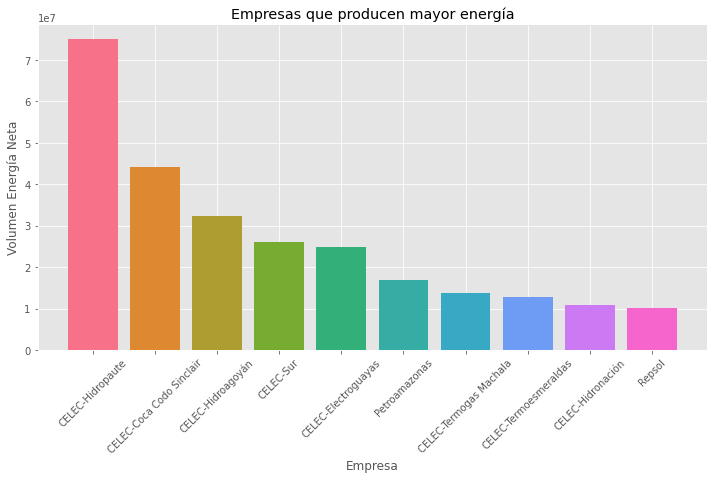

In [44]:
#Empresas que producen mayor cantidad de energía. 

#Agrupamos incialmente las columnas por la variable categórica. El volumen de energía neto. 

produccion_por_empresa = df1.groupby('Empresa')['Energia_Neta_MWh'].sum().sort_values(ascending=False)

#seleccinamos las 10 principales clumnas. 

top_10_empresas = produccion_por_empresa.head(10)

# pasamos al gráfico de barras. 

palette = sns.color_palette("husl", 10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_empresas.index, top_10_empresas.values, color=palette)

plt.xlabel('Empresa')
plt.ylabel('Volumen Energía Neta')
plt.title('Empresas que producen mayor energía')

plt.xticks(rotation=45)

plt.show()

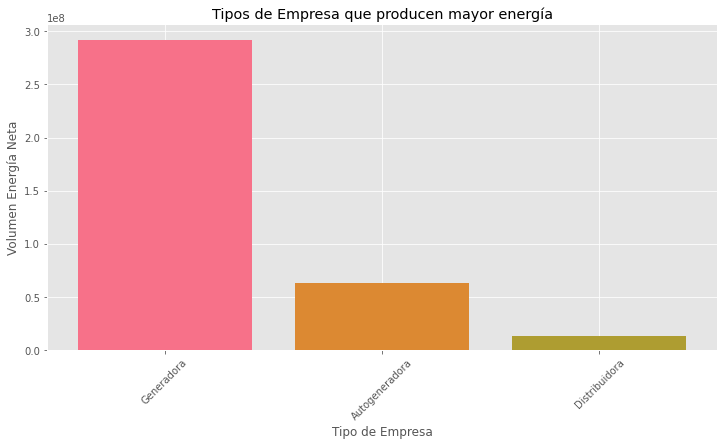

In [45]:
#Agrupamos incialmente las columnas por la variable categórica. El volumen de energía neto. 

produccion_por_tipo_empresa = df1.groupby('Tipo_Empresa')['Energia_Neta_MWh'].sum().sort_values(ascending=False)

#seleccinamos las 10 principales clumnas. 

top_10_tipo_empresa = produccion_por_tipo_empresa.head(15)

# pasamos al gráfico de barras. 

palette = sns.color_palette("husl", 10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_tipo_empresa.index, top_10_tipo_empresa.values, color=palette)

plt.xlabel('Tipo de Empresa')
plt.ylabel('Volumen Energía Neta')
plt.title('Tipos de Empresa que producen mayor energía')

plt.xticks(rotation=45)

plt.show()

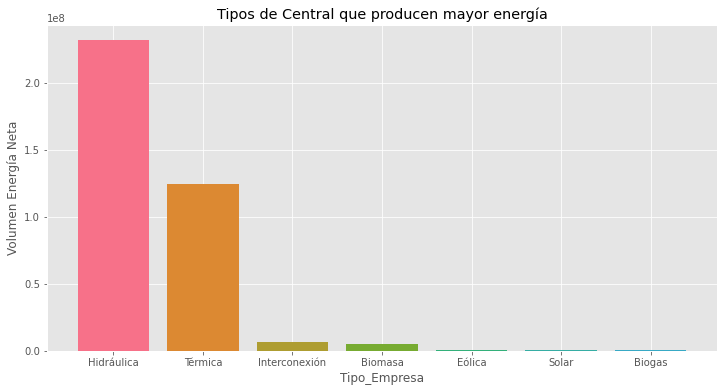

In [46]:
#Agrupamos incialmente las columnas por la variable categórica. El volumen de energía neto. 

produccion_por_tipo_central = df1.groupby('Tipo_Central')['Energia_Neta_MWh'].sum().sort_values(ascending=False)

#seleccinamos las 10 principales clumnas. 

top_10_tipo_centrales = produccion_por_tipo_central.head(15)

# pasamos al gráfico de barras. 

palette = sns.color_palette("husl", 10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_tipo_centrales.index, top_10_tipo_centrales.values, color=palette)

plt.xlabel('Tipo_Empresa')
plt.ylabel('Volumen Energía Neta')
plt.title('Tipos de Central que producen mayor energía')

#plt.xticks(rotation=45)

plt.show()

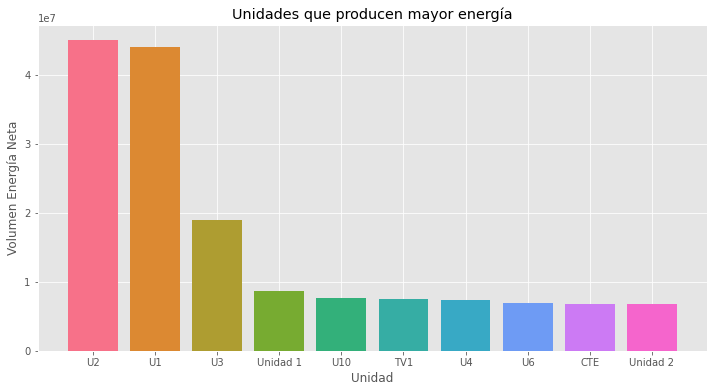

In [47]:
#Agrupamos incialmente las columnas por la variable categórica. El volumen de energía neto. 

produccion_por_unidad = df1.groupby('Unidad')['Energia_Neta_MWh'].sum().sort_values(ascending=False)

#seleccinamos las 10 principales clumnas. 

top_10_unidades = produccion_por_unidad.head(10)

# pasamos al gráfico de barras. 

palette = sns.color_palette("husl", 10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_unidades.index, top_10_unidades.values, color=palette)

plt.xlabel('Unidad')
plt.ylabel('Volumen Energía Neta')
plt.title('Unidades que producen mayor energía')

#plt.xticks(rotation=45)

plt.show()

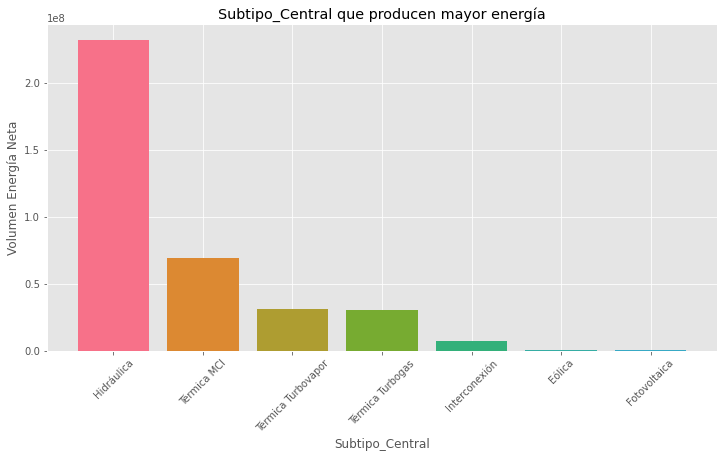

In [48]:
#Agrupamos incialmente las columnas por la variable categórica. El volumen de energía neto. 

produccion_por_subtipo = df1.groupby('Subtipo_Central')['Energia_Neta_MWh'].sum().sort_values(ascending=False)

#seleccinamos las 10 principales clumnas. 

top_10_subtipo = produccion_por_subtipo.head(10)

# pasamos al gráfico de barras. 

palette = sns.color_palette("husl", 10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_subtipo.index, top_10_subtipo.values, color=palette)

plt.xlabel('Subtipo_Central')
plt.ylabel('Volumen Energía Neta')
plt.title('Subtipo_Central que producen mayor energía')

plt.xticks(rotation=45)

plt.show()

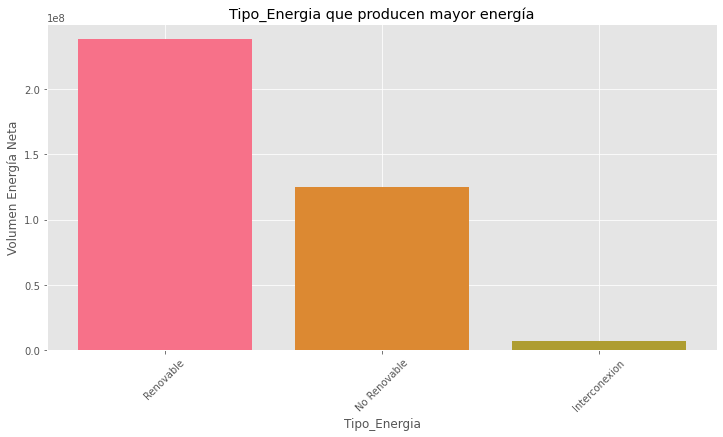

In [49]:
#Agrupamos incialmente las columnas por la variable categórica. El volumen de energía neto. 

produccion_por_energia = df1.groupby('Tipo_Energia')['Energia_Neta_MWh'].sum().sort_values(ascending=False)

#seleccinamos las 10 principales clumnas. 

top_10_energia = produccion_por_energia.head(10)

# pasamos al gráfico de barras. 

palette = sns.color_palette("husl", 10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_energia.index, top_10_energia.values, color=palette)

plt.xlabel('Tipo_Energia')
plt.ylabel('Volumen Energía Neta')
plt.title('Tipo_Energia que producen mayor energía')

plt.xticks(rotation=45)

plt.show()

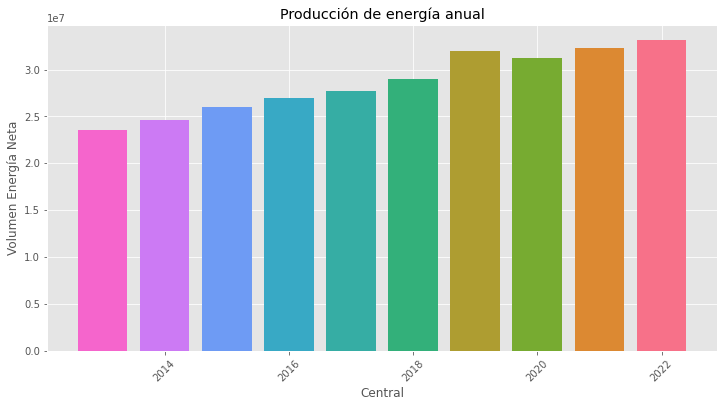

In [50]:
#Agrupamos incialmente las columnas por la variable categórica. El volumen de energía neto. 

produccion_por_año = df1.groupby('Año')['Energia_Neta_MWh'].sum().sort_values(ascending=False)

#seleccinamos las 10 principales clumnas. 

top_10_año = produccion_por_año.head(10)

# pasamos al gráfico de barras. 

palette = sns.color_palette("husl", 10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_año.index, top_10_año.values, color=palette)

plt.xlabel('Central')
plt.ylabel('Volumen Energía Neta')
plt.title('Producción de energía anual')

plt.xticks(rotation=45)

plt.show()


# VISUALIZACIÓN DE VARIABLES CONTINUAS Y CATEGÓRICAS MODELO 3

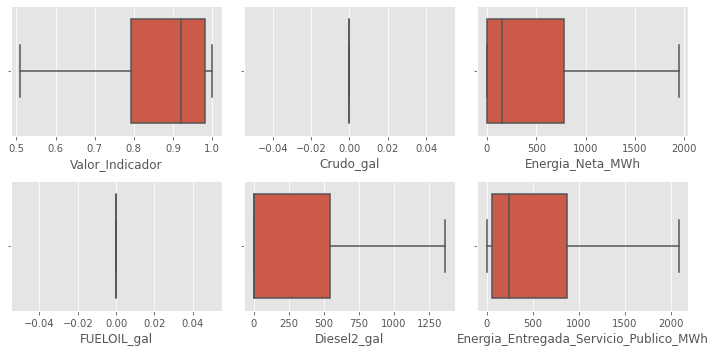

In [307]:
# se obtienen box plots con la finalidad de bucar outliers y validar en caso de que sea necersario eliminar 
#alguna variable del análisis df3
#Como se ve, en ambos dataframes, se tienen muchos outliers, al usar un módelo robusto como es el random forest, no se procede
#con la eliminación de outliers. 

fig, axs = plt.subplots(2,3, figsize = (10,5))

plt1 = sns.boxplot(df3['Valor_Indicador'], ax = axs[0,0], showfliers=False)
plt2 = sns.boxplot(df3['Crudo_gal'], ax = axs[0,1], showfliers=False)
plt3 = sns.boxplot(df3['Energia_Neta_MWh'], ax = axs[0,2], showfliers=False)
plt1 = sns.boxplot(df3['FUELOIL_gal'], ax = axs[1,0], showfliers=False)
plt2 = sns.boxplot(df3['Diesel2_gal'], ax = axs[1,1], showfliers=False)
plt3 = sns.boxplot(df3['Energia_Entregada_Servicio_Publico_MWh'], ax = axs[1,2], showfliers=False)



plt.tight_layout()

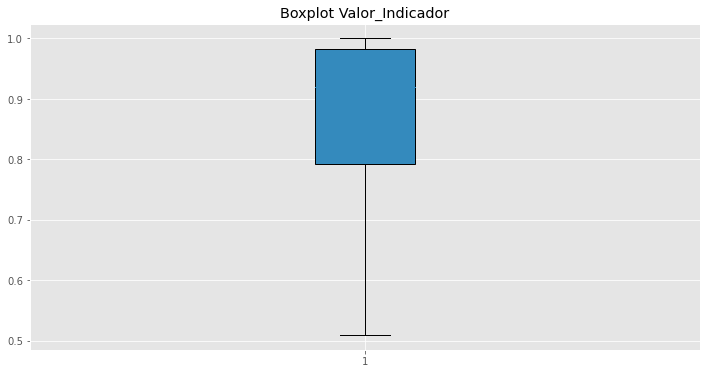

In [308]:
#Revisamos variable por variable la distribución en cajas
plt.figure(figsize=(12,6))
plt.boxplot(df3['Valor_Indicador'], showfliers=False, patch_artist=True)
plt.title('Boxplot Valor_Indicador')
plt.show()

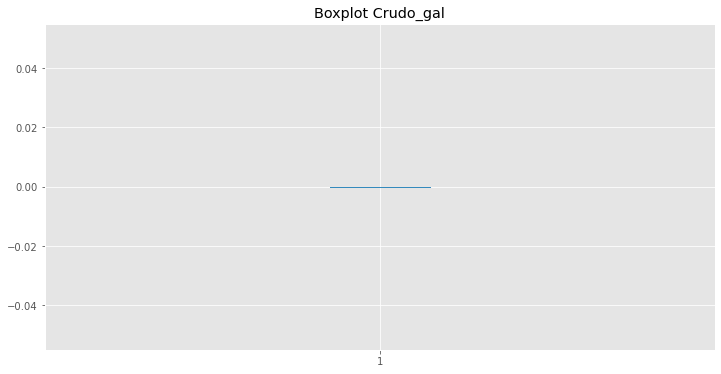

In [310]:
#Revisamos variable por variable la distribución en cajas
plt.figure(figsize=(12,6))
plt.boxplot(df3['Crudo_gal'], patch_artist=True, showfliers=False)
plt.title('Boxplot Crudo_gal')
plt.show()

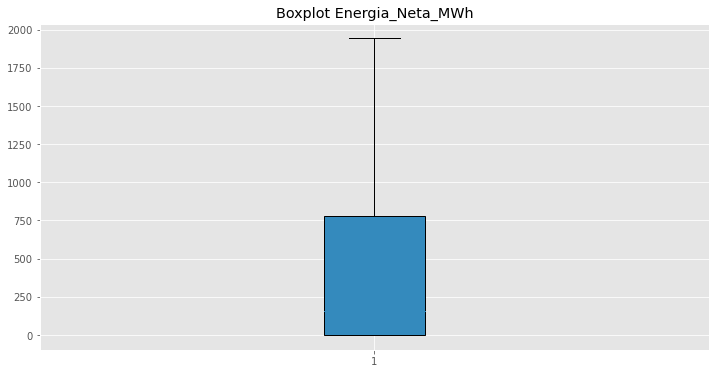

In [311]:
#Revisamos variable por variable la distribución en cajas
plt.figure(figsize=(12,6))
plt.boxplot(df3['Energia_Neta_MWh'],  showfliers=False, patch_artist=True)
plt.title('Boxplot Energia_Neta_MWh')
plt.show()

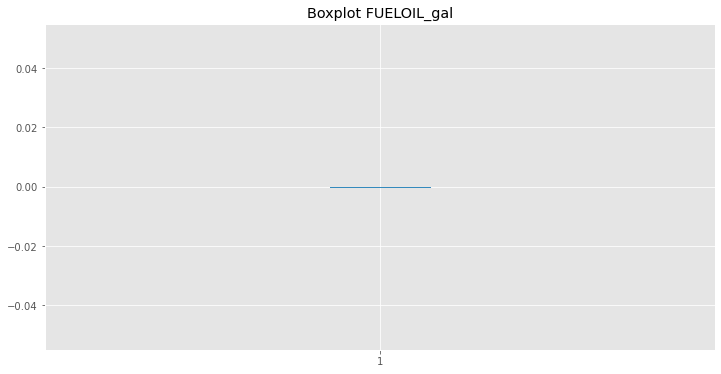

In [312]:
#Revisamos variable por variable la distribución en cajas
plt.figure(figsize=(12,6))
plt.boxplot(df3['FUELOIL_gal'],  showfliers=False, patch_artist=True)
plt.title('Boxplot FUELOIL_gal')
plt.show()

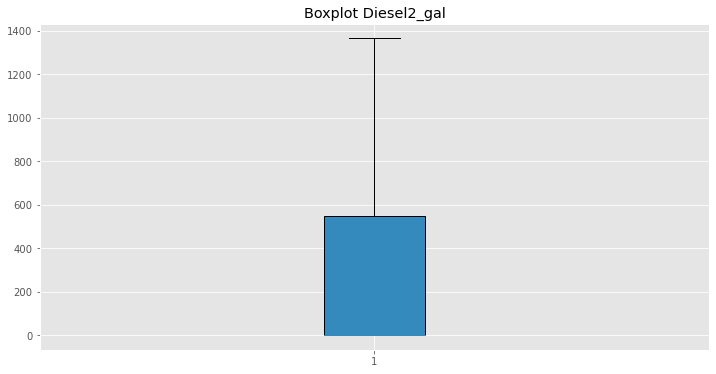

In [313]:
#Revisamos variable por variable la distribución en cajas
plt.figure(figsize=(12,6))
plt.boxplot(df3['Diesel2_gal'],  showfliers=False, patch_artist=True)
plt.title('Boxplot Diesel2_gal')
plt.show()

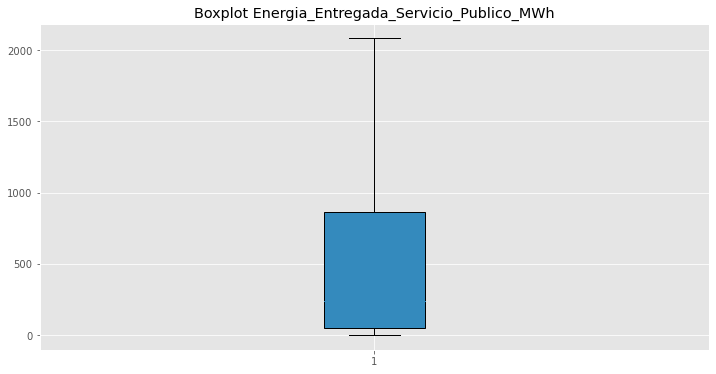

In [315]:
#Revisamos variable por variable la distribución en cajas
plt.figure(figsize=(12,6))
plt.boxplot(df3['Energia_Entregada_Servicio_Publico_MWh'], showfliers=False, patch_artist=True)
plt.title('Boxplot Energia_Entregada_Servicio_Publico_MWh')
plt.show()

# CREAMOS GRÁFICOS DE DENSIDAD PARA CADA UNA DE LAS VARIABLES QUE MÁS EXPLICAN EN EL MODELO

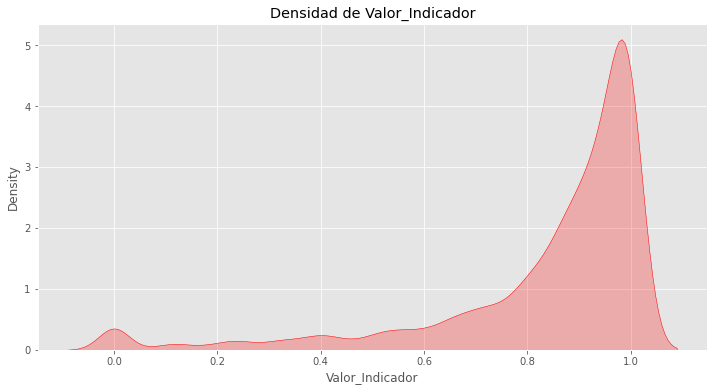

In [58]:
#Vamos a observar como es la distribución de las variables objetivo en cada uno de las dataframe3
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=df3, x = 'Valor_Indicador',ax=ax, color = "red", shade = "True")
ax.set_title('Densidad de Valor_Indicador')

plt.show()

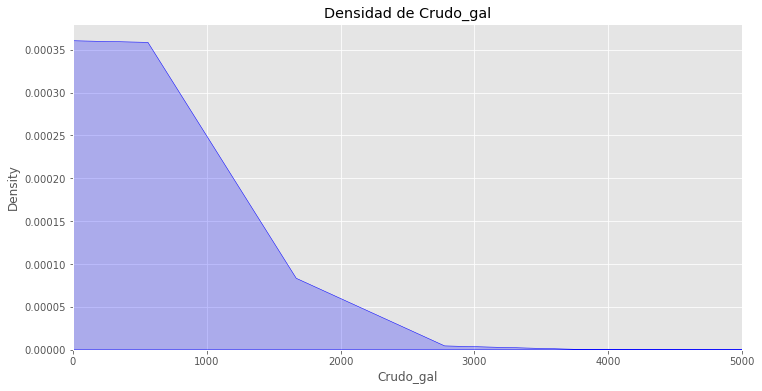

In [324]:
#Vamos a observar como es la distribución de las variables objetivo en cada uno de las dataframe3
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=df3, x = 'Crudo_gal',ax=ax, color = "blue", shade = "True")
plt.xlim(0, 5000)
ax.set_title('Densidad de Crudo_gal')

plt.show()

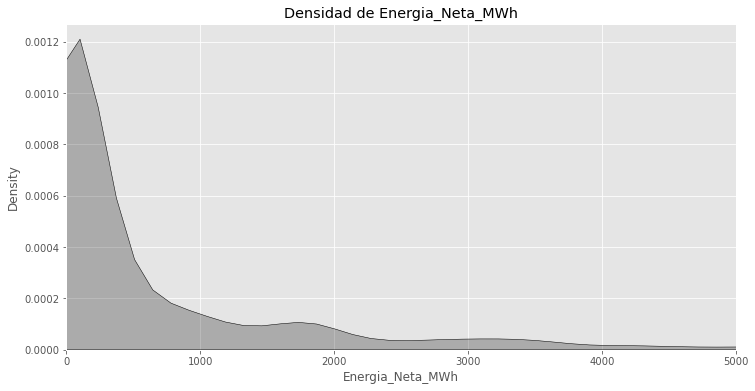

In [321]:
#Vamos a observar como es la distribución de las variables objetivo en cada uno de las dataframe3
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=df3, x = 'Energia_Neta_MWh',ax=ax, color = "black", shade = "True")
plt.xlim(0, 5000)

ax.set_title('Densidad de Energia_Neta_MWh')

plt.show()

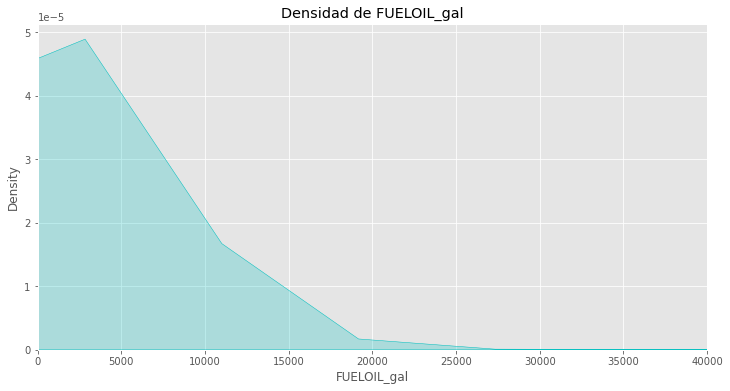

In [326]:
#Vamos a observar como es la distribución de las variables objetivo en cada uno de las dataframe3
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=df3, x = 'FUELOIL_gal',ax=ax, color = "c", shade = "True")
plt.xlim(0, 40000)
ax.set_title('Densidad de FUELOIL_gal')

plt.show()

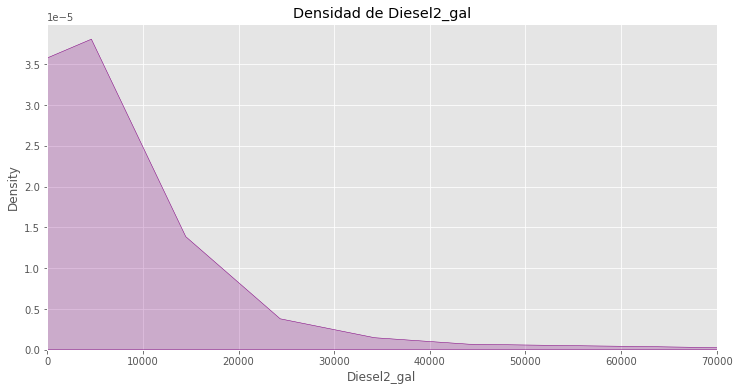

In [328]:
#Vamos a observar como es la distribución de las variables objetivo en cada uno de las dataframe3
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=df3, x = 'Diesel2_gal',ax=ax, color = "purple", shade = "True")
plt.xlim(0, 70000)
ax.set_title('Densidad de Diesel2_gal')

plt.show()

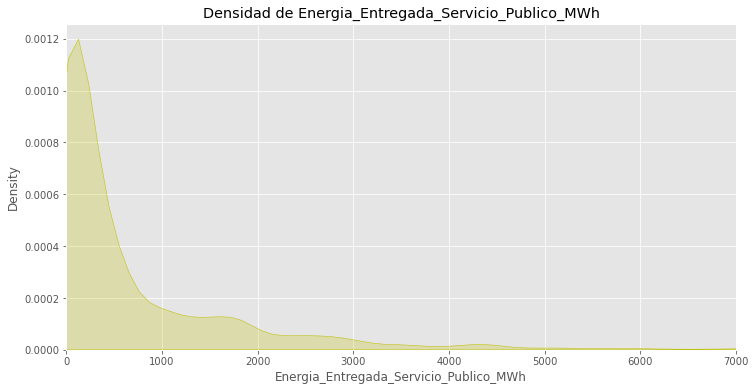

In [331]:
#Vamos a observar como es la distribución de las variables objetivo en cada uno de las dataframe3
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=df3, x = 'Energia_Entregada_Servicio_Publico_MWh',ax=ax, color = "y", shade = "True")
plt.xlim(0, 7000)
ax.set_title('Densidad de Energia_Entregada_Servicio_Publico_MWh')

plt.show()

# VARIABLES CATEGÓRICAS, SE TRAZAN GRÁFICAS BARRAS PARA MEDIR LA DISTRIBUCIÓN Y ACUMULACIÓN DE OBSERVACIONES

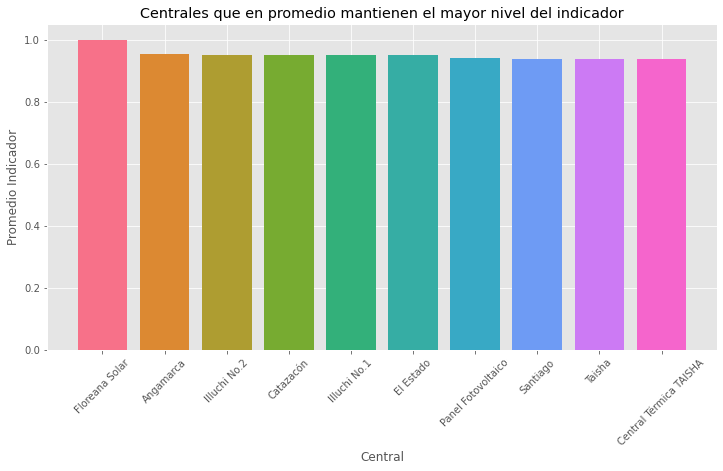

In [64]:
#Gráficamos las principales variables cateóricas por aquellas que producen el mayor nivel de energía. Al tener muchas partidas, 
#se toman en cuenta únicamente las 10 centrales que más producen

#columnas_categoricas = ['Central', 'Año', 'Id_Mes', 'Tipo_Energia', 'Sistema', 'Tipo Area', 'Unidad', 'Subtipo_Central', 'Tipo_Central']
#dependiente = Energia_Neta_MWh

#Agrupamos incialmente las columnas por la variable categórica. El volumen de energía neto. 

produccion_por_central = df3.groupby('Central')['Valor_Indicador'].mean().sort_values(ascending=False)

#seleccinamos las 10 principales clumnas. 

top_10_centrales = produccion_por_central.head(10)

# pasamos al gráfico de barras. 

palette = sns.color_palette("husl", 10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_centrales.index, top_10_centrales.values, color=palette)

plt.xlabel('Central')
plt.ylabel('Promedio Indicador')
plt.title('Centrales que en promedio mantienen el mayor nivel del indicador')

plt.xticks(rotation=45)

plt.show()

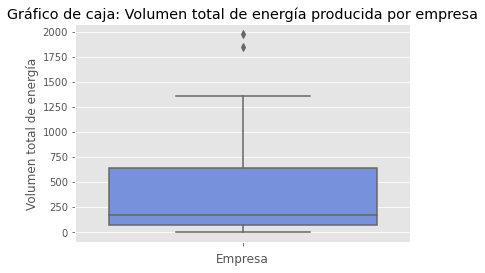

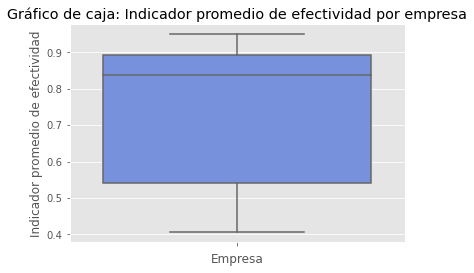

In [333]:
#Se generan gráficos de caja para poder clasificar por Quantiles las empresas que más energía generan en promedio y las que 
#tienen el mejor índice de efectividad. De modo que se puedan agrupar en en cuatro grupos para un posible problema de 
#clasificación.En la agrupación constarían las empresas de la siguiente forma en función de la media: Alta producción y 
#alto índice. Baja producción y alto índice. Alta producción y bajo índice. Baja producción y bajo índice. 

#procedemos a agrupar los datos de df3 por el valor total de energía producida, así como la media del valor de indicador. 

df3_group = df3.groupby('Empresa').agg({'Energia_Neta_MWh': 'mean', 'Valor_Indicador': 'mean'}).reset_index()
#gráficamos el primer rango intercurtil agrupado por producción. 

palette = sns.color_palette("coolwarm")  

#gráfico para el volumen de energía producida 
plt.figure()
sns.boxplot(data=df3_group, y='Energia_Neta_MWh', orient='h', palette=palette)
plt.xlabel('Empresa')
plt.ylabel('Volumen total de energía')
plt.title('Gráfico de caja: Volumen total de energía producida por empresa')

#gráfico para el mejor indicador promedio

plt.figure()
sns.boxplot(data=df3_group, y='Valor_Indicador', orient='h', palette=palette)
plt.xlabel('Empresa')
plt.ylabel('Indicador promedio de efectividad')
plt.title('Gráfico de caja: Indicador promedio de efectividad por empresa')

plt.show()

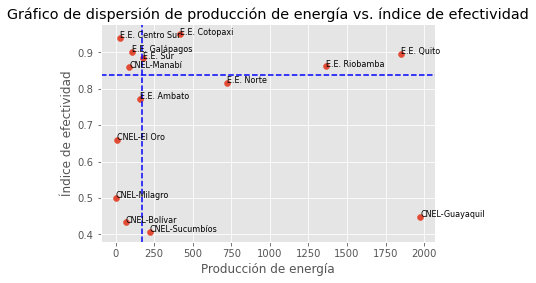

<Figure size 1728x1152 with 0 Axes>

In [334]:
#Procedemos con la creación de un gráfico de dispersión en función de las medias de los gráficos de cajas anteriormente 
#generados. 

#Agrupamos por la media de energía producida e indicador a las empresas. 

df3_group = df3.groupby('Empresa').agg({'Energia_Neta_MWh': 'mean', 'Valor_Indicador': 'mean'}).reset_index()

#Calculamos la media para cada grupo

mediana_energia = df3_group['Energia_Neta_MWh'].median()
mediana_efectividad = df3_group['Valor_Indicador'].median()

#creamos el gráfico de dispersión

plt.scatter(df3_group['Energia_Neta_MWh'], df3_group['Valor_Indicador'])

#se dibujan las líneas verticales y horizontales para validar los cuadrantes

plt.axvline(x=mediana_energia, color='b', linestyle='--')
plt.axhline(y=mediana_efectividad, color='b', linestyle='--')

#Agregamos etiquetas a cada burbuja

for index, row in df3_group.iterrows():
    plt.text(row['Energia_Neta_MWh'], row['Valor_Indicador'], row['Empresa'], fontsize=8)

#confuguramos los ejes 

plt.xlabel('Producción de energía')
plt.ylabel('Índice de efectividad')
plt.title('Gráfico de dispersión de producción de energía vs. índice de efectividad')

#Tamaño gráfico

plt.figure(figsize=(24, 16))

# Mostrar el gráfico

plt.show()

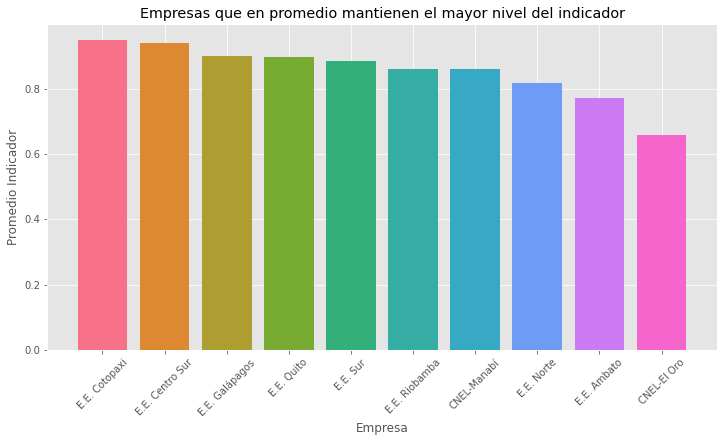

In [67]:
#Agrupamos incialmente las columnas por la variable categórica. El volumen de energía neto. 

produccion_por_empresa = df3.groupby('Empresa')['Valor_Indicador'].mean().sort_values(ascending=False)

#seleccinamos las 10 principales clumnas. 

top_10_empresas = produccion_por_empresa.head(10)

# pasamos al gráfico de barras. 

palette = sns.color_palette("husl", 10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_empresas.index, top_10_empresas.values, color=palette)

plt.xlabel('Empresa')
plt.ylabel('Promedio Indicador')
plt.title('Empresas que en promedio mantienen el mayor nivel del indicador')

plt.xticks(rotation=45)

plt.show()

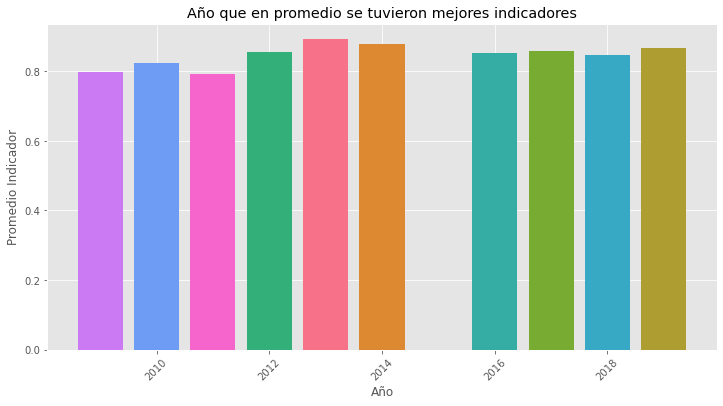

In [68]:
#Agrupamos incialmente las columnas por la variable categórica. El volumen de energía neto. 

produccion_por_central = df3.groupby('Año')['Valor_Indicador'].mean().sort_values(ascending=False)

#seleccinamos las 10 principales clumnas. 

top_10_caracteristicas = produccion_por_central.head(10)

# pasamos al gráfico de barras. 

palette = sns.color_palette("husl", 10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_caracteristicas.index, top_10_caracteristicas.values, color=palette)

plt.xlabel('Año')
plt.ylabel('Promedio Indicador')
plt.title('Año que en promedio se tuvieron mejores indicadores')

plt.xticks(rotation=45)

plt.show()

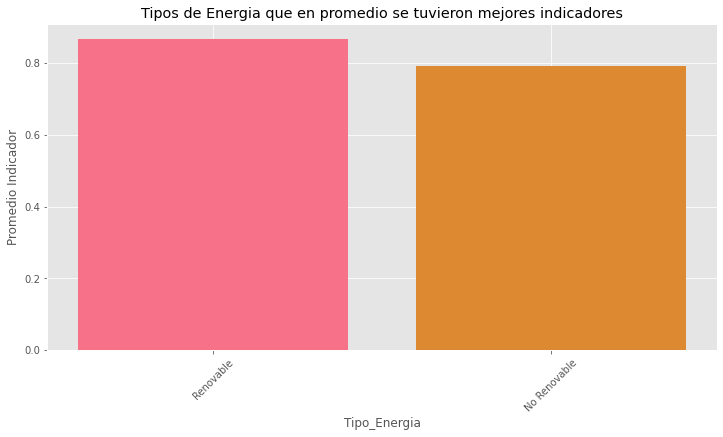

In [69]:
#Agrupamos incialmente las columnas por la variable categórica. El volumen de energía neto. 

produccion_por_central = df3.groupby('Tipo_Energia')['Valor_Indicador'].mean().sort_values(ascending=False)

#seleccinamos las 10 principales clumnas. 

top_10_caracteristicas = produccion_por_central.head(10)

# pasamos al gráfico de barras. 

palette = sns.color_palette("husl", 10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_caracteristicas.index, top_10_caracteristicas.values, color=palette)

plt.xlabel('Tipo_Energia')
plt.ylabel('Promedio Indicador')
plt.title('Tipos de Energia que en promedio se tuvieron mejores indicadores')

plt.xticks(rotation=45)

plt.show()

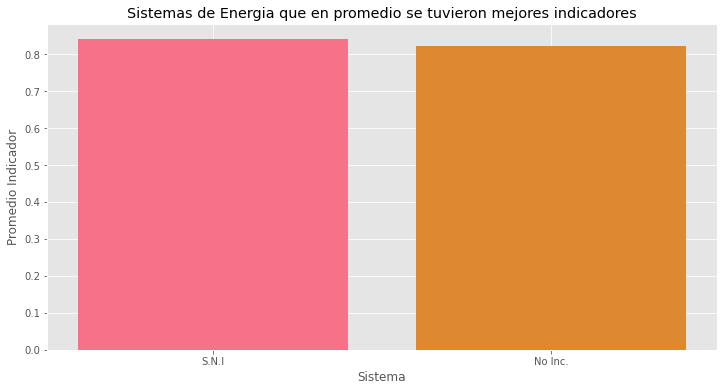

In [70]:
#Agrupamos incialmente las columnas por la variable categórica. El volumen de energía neto. 

produccion_por_central = df3.groupby('Sistema')['Valor_Indicador'].mean().sort_values(ascending=False)

#seleccinamos las 10 principales clumnas. 

top_10_caracteristicas = produccion_por_central.head(10)

# pasamos al gráfico de barras. 

palette = sns.color_palette("husl", 10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_caracteristicas.index, top_10_caracteristicas.values, color=palette)

plt.xlabel('Sistema')
plt.ylabel('Promedio Indicador')
plt.title('Sistemas de Energia que en promedio se tuvieron mejores indicadores')

#plt.xticks(rotation=45)

plt.show()

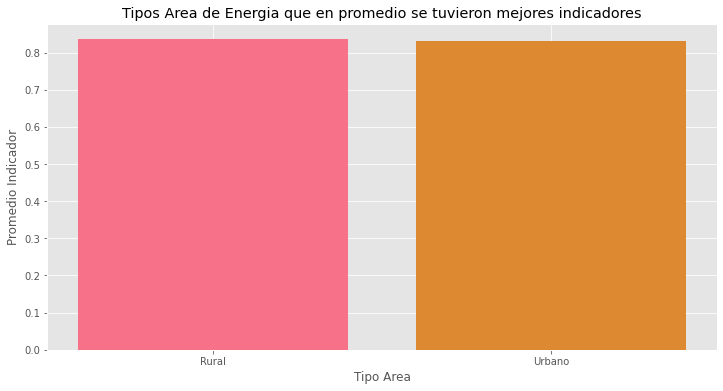

In [71]:
#Agrupamos incialmente las columnas por la variable categórica. El volumen de energía neto. 

produccion_por_central = df3.groupby('Tipo Area')['Valor_Indicador'].mean().sort_values(ascending=False)

#seleccinamos las 10 principales clumnas. 

top_10_caracteristicas = produccion_por_central.head(10)

# pasamos al gráfico de barras. 

palette = sns.color_palette("husl", 10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_caracteristicas.index, top_10_caracteristicas.values, color=palette)

plt.xlabel('Tipo Area')
plt.ylabel('Promedio Indicador')
plt.title('Tipos Area de Energia que en promedio se tuvieron mejores indicadores')

#plt.xticks(rotation=45)

plt.show()

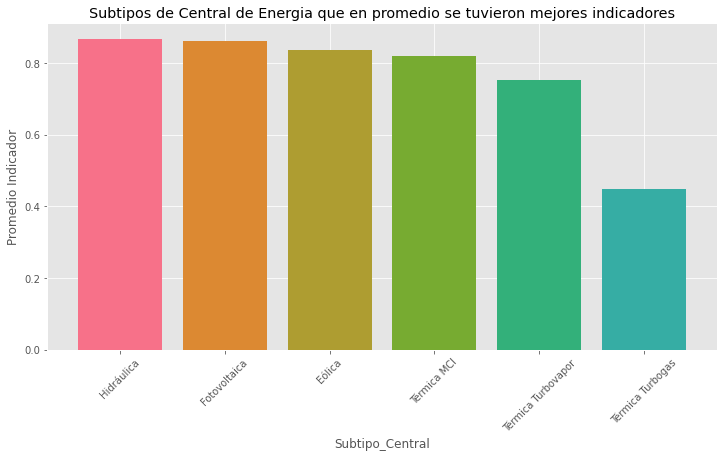

In [72]:
#Agrupamos incialmente las columnas por la variable categórica. El volumen de energía neto. 

produccion_por_central = df3.groupby('Subtipo_Central')['Valor_Indicador'].mean().sort_values(ascending=False)

#seleccinamos las 10 principales clumnas. 

top_10_caracteristicas = produccion_por_central.head(10)

# pasamos al gráfico de barras. 

palette = sns.color_palette("husl", 10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_caracteristicas.index, top_10_caracteristicas.values, color=palette)

plt.xlabel('Subtipo_Central')
plt.ylabel('Promedio Indicador')
plt.title('Subtipos de Central de Energia que en promedio se tuvieron mejores indicadores')

plt.xticks(rotation=45)

plt.show()

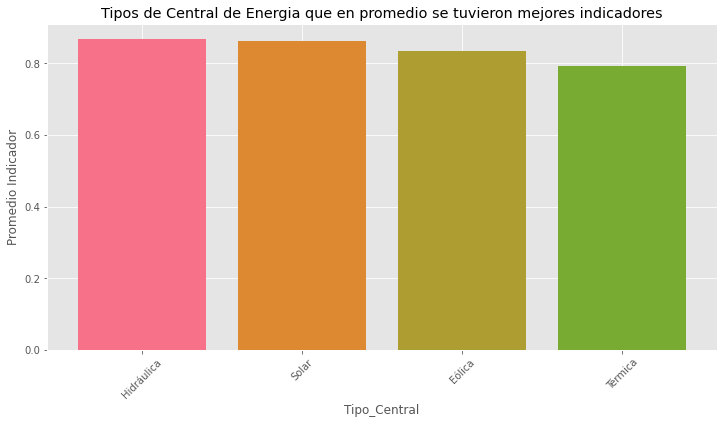

In [73]:
#Agrupamos incialmente las columnas por la variable categórica. El volumen de energía neto. 

produccion_por_central = df3.groupby('Tipo_Central')['Valor_Indicador'].mean().sort_values(ascending=False)

#seleccinamos las 10 principales clumnas. 

top_10_caracteristicas = produccion_por_central.head(10)

# pasamos al gráfico de barras. 

palette = sns.color_palette("husl", 10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_caracteristicas.index, top_10_caracteristicas.values, color=palette)

plt.xlabel('Tipo_Central')
plt.ylabel('Promedio Indicador')
plt.title('Tipos de Central de Energia que en promedio se tuvieron mejores indicadores')

plt.xticks(rotation=45)

plt.show()

# SE GENERAN MATRICES DE CORRELACIÓN PARA AMBOS MODELOS

## MATRIZ df1

In [335]:
df1.corr().style.background_gradient(cmap='coolwarm')

,Año,Id_Mes,Id_Empresa,Id_Central,Energia_Bruta_MWh,Consumo_Auxiliare_ Unidades_MWh,Energia_Neta_MWh,FUELOIL_gal,Diesel2_gal,Nafta_gal,Gas_Natural_kpc,Biogas_mpc,Crudo_gal,Residuo (gal),Bagazo_t,LPG_gal,Energia_Entregada_Servicio_Publico_MWh,Energia_Entregada_Servicio_No_Publico_MWh
Año,1.000000,-0.000982,0.209823,0.278314,0.007429,-0.030800,0.008304,-0.034968,-0.049833,-0.014532,-0.022956,0.043975,0.024916,-0.049188,-0.000073,-0.009047,0.002728,0.052627
Id_Mes,-0.000982,1.000000,0.005900,0.010006,-0.000078,0.001453,-0.000116,0.001357,0.006701,-0.001663,-0.000515,0.002452,0.005234,0.003741,0.041660,-0.000711,-0.001642,0.013895
Id_Empresa,0.209823,0.005900,1.000000,0.490163,-0.037657,-0.069201,-0.036285,-0.043726,-0.036614,0.003065,-0.025723,0.119130,-0.023403,-0.047157,-0.041052,-0.073171,-0.040383,0.027457
Id_Central,0.278314,0.010006,0.490163,1.000000,-0.042743,-0.083299,-0.041063,-0.057426,-0.018104,0.001453,-0.041720,0.078495,-0.071734,-0.041412,-0.053262,-0.012458,-0.036021,-0.062066
Energia_Bruta_MWh,0.007429,-0.000078,-0.037657,-0.042743,1.000000,0.433852,0.999730,0.360680,0.117763,0.037668,0.156460,-0.009851,0.018264,0.032037,0.052948,-0.002450,0.953111,0.033291
Consumo_Auxiliare_ Unidades_MWh,-0.030800,0.001453,-0.069201,-0.083299,0.433852,1.000000,0.412815,0.858939,0.086956,0.003849,0.144813,-0.004472,0.051512,0.071605,0.051447,0.001836,0.407929,0.022222
Energia_Neta_MWh,0.008304,-0.000116,-0.036285,-0.041063,0.999730,0.412815,1.000000,0.342481,0.116807,0.037979,0.154435,-0.009843,0.017136,0.030542,0.052200,-0.002524,0.952998,0.033082
FUELOIL_gal,-0.034968,0.001357,-0.043726,-0.057426,0.360680,0.858939,0.342481,1.000000,0.008079,-0.000879,-0.008592,-0.004513,-0.018214,-0.008524,-0.004720,-0.004221,0.346069,-0.029641
Diesel2_gal,-0.049833,0.006701,-0.036614,-0.018104,0.117763,0.086956,0.116807,0.008079,1.000000,0.055347,-0.007790,-0.007234,-0.026127,0.011836,-0.007565,-0.005121,0.099482,0.131753
Nafta_gal,-0.014532,-0.001663,0.003065,0.001453,0.037668,0.003849,0.037979,-0.000879,0.055347,1.000000,-0.000966,-0.000507,-0.002047,-0.000976,-0.000530,-0.000474,0.039994,-0.003909


## MATRIZ df3

In [336]:
df3.corr().style.background_gradient(cmap='coolwarm')

,Año,Id_Mes,Id_Empresa,Id_Central,Energia_Bruta_MWh,Consumo_Auxiliare_ Unidades_MWh,Energia_Neta_MWh,FUELOIL_gal,Diesel2_gal,Crudo_gal,Residuo (gal),Energia_Entregada_Servicio_Publico_MWh,Valor_Indicador
Año,1.000000,-0.045630,-0.085519,0.309477,0.018640,-0.022873,0.019375,0.019968,0.000918,-0.063062,-0.018648,0.021780,0.056202
Id_Mes,-0.045630,1.000000,-0.019851,0.008407,-0.017197,0.023811,-0.017936,0.014999,0.023922,0.003558,-0.023170,-0.020333,0.073607
Id_Empresa,-0.085519,-0.019851,1.000000,-0.075401,0.200394,0.103456,0.200565,0.044258,-0.072342,0.055734,0.027082,0.227397,-0.002040
Id_Central,0.309477,0.008407,-0.075401,1.000000,-0.073606,-0.011119,-0.074264,-0.002341,-0.002109,-0.016595,-0.008064,-0.084536,-0.023583
Energia_Bruta_MWh,0.018640,-0.017197,0.200394,-0.073606,1.000000,0.562238,0.999832,0.425641,0.480174,0.056695,0.036934,0.882764,-0.006739
Consumo_Auxiliare_ Unidades_MWh,-0.022873,0.023811,0.103456,-0.011119,0.562238,1.000000,0.546990,0.670297,0.401254,0.087623,0.053304,0.502469,-0.061411
Energia_Neta_MWh,0.019375,-0.017936,0.200565,-0.074264,0.999832,0.546990,1.000000,0.416020,0.477185,0.055450,0.036207,0.882480,-0.005461
FUELOIL_gal,0.019968,0.014999,0.044258,-0.002341,0.425641,0.670297,0.416020,1.000000,-0.013228,-0.007123,-0.003461,0.427685,-0.035448
Diesel2_gal,0.000918,0.023922,-0.072342,-0.002109,0.480174,0.401254,0.477185,-0.013228,1.000000,0.000616,-0.002068,0.416906,-0.125317
Crudo_gal,-0.063062,0.003558,0.055734,-0.016595,0.056695,0.087623,0.055450,-0.007123,0.000616,1.000000,-0.001212,-0.006251,-0.087440


# REVISIÓN DE COMPONENTES DE TEMPRALIDAD, PARA VALIDAR IMPORTANCIA DE MANEJO DE PRODUCCIÓN ENERGÉTICA EN EL TIEMPO

In [76]:
#seleccionamos únicamente la clumna año y mes
df_time = df1[['Año', 'Energia_Neta_MWh', 'Id_Mes']]
df_time

,Año,Energia_Neta_MWh,Id_Mes
0,2009,0.000000,5
1,2009,9548.080000,6
2,2009,15680.030000,7
3,2009,16735.410000,8
4,2009,43427.380508,5
...,...,...,...
143493,2022,646.489446,5
143494,2022,767.714734,5
143495,2022,641.149766,5
143496,2022,614.492584,5


In [77]:
#transformamos los tados del df_time en fechas
df_time['Fecha'] = pd.to_datetime(df_time['Año'].astype(str) + '-' + df_time['Id_Mes'].astype(str), format='%Y-%m') + pd.offsets.MonthEnd(1)
df_time

,Año,Energia_Neta_MWh,Id_Mes,Fecha
0,2009,0.000000,5,2009-05-31
1,2009,9548.080000,6,2009-06-30
2,2009,15680.030000,7,2009-07-31
3,2009,16735.410000,8,2009-08-31
4,2009,43427.380508,5,2009-05-31
...,...,...,...,...
143493,2022,646.489446,5,2022-05-31
143494,2022,767.714734,5,2022-05-31
143495,2022,641.149766,5,2022-05-31
143496,2022,614.492584,5,2022-05-31


In [78]:
df_time_fin = df_time[['Fecha', 'Energia_Neta_MWh']]
df_time_fin

,Fecha,Energia_Neta_MWh
0,2009-05-31,0.000000
1,2009-06-30,9548.080000
2,2009-07-31,15680.030000
3,2009-08-31,16735.410000
4,2009-05-31,43427.380508
...,...,...
143493,2022-05-31,646.489446
143494,2022-05-31,767.714734
143495,2022-05-31,641.149766
143496,2022-05-31,614.492584


In [79]:
df_time_fin.dtypes

Fecha               datetime64[ns]
Energia_Neta_MWh           float64
dtype: object

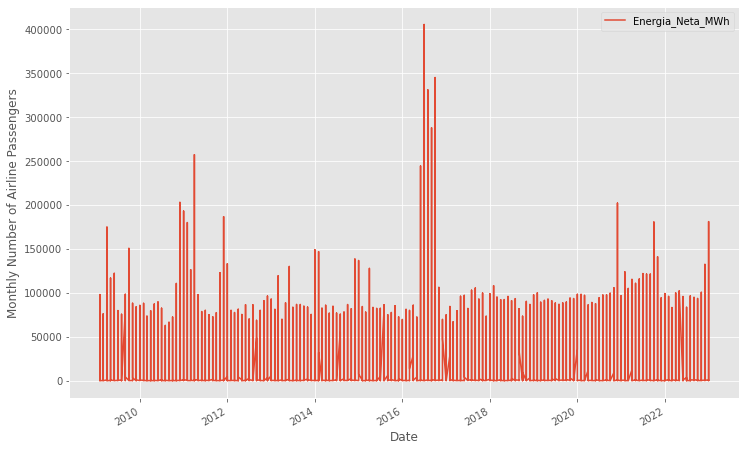

In [80]:
ax = df_time_fin.set_index('Fecha').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

# DEFINICIÓN DE VARIABLE OBJETIVO Y VARIABLES PREDICTORAS

In [81]:
#Declaración de las variables dependientes e independientes. Se retira la variable "Consumo de energía auxiliares" por no 
#tener relación con ninguna variable en ninguna de las dos bases
#Creo conjuntos para base 1
#expulso el mes para usar únicamente la columna ID_MES, también se retira la energía bruta, al tener una relación directa
#con la variable a predecir. 
X1 = df1.drop(['Consumo_Auxiliare_ Unidades_MWh', 'Mes', 'Energia_Neta_MWh', 'Energia_Bruta_MWh', 
               'Energia_Entregada_Servicio_Publico_MWh', 'Empresa', 'Id_Empresa', 'Id_Central',], axis=1)
Y1 = df1['Energia_Neta_MWh']

In [82]:
#Creo variables para conjunto de datos 3
X3 = df3.drop(['Consumo_Auxiliare_ Unidades_MWh', 'Mes', 'Valor_Indicador', 'Empresa', 'Id_Empresa', 'Id_Central'], axis=1)
Y3 = df3['Valor_Indicador']

In [83]:
#visualizo la forma de las variables
X1.head()

,Año,Id_Mes,Tipo_Empresa,Central,Unidad,Tipo_Central,Subtipo_Central,Tipo_Energia,Tipo_Servicio,Sistema,FUELOIL_gal,Diesel2_gal,Nafta_gal,Gas_Natural_kpc,Biogas_mpc,Crudo_gal,Residuo (gal),Bagazo_t,LPG_gal,Energia_Entregada_Servicio_No_Publico_MWh
0,2009,5,Generadora,Enrique García,TG-5,Térmica,Térmica Turbogas,No Renovable,Público,S.N.I,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,2009,6,Generadora,Enrique García,TG-5,Térmica,Térmica Turbogas,No Renovable,Público,S.N.I,0.0,906926.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.809999
2,2009,7,Generadora,Enrique García,TG-5,Térmica,Térmica Turbogas,No Renovable,Público,S.N.I,0.0,1440890.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.610000
3,2009,8,Generadora,Enrique García,TG-5,Térmica,Térmica Turbogas,No Renovable,Público,S.N.I,0.0,1491300.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.450000
4,2009,5,Generadora,Paute,U1,Hidráulica,Hidráulica,Renovable,Público,S.N.I,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [84]:
#visualizo la forma de las variables
Y1.head()

0        0.000000
1     9548.080000
2    15680.030000
3    16735.410000
4    43427.380508
Name: Energia_Neta_MWh, dtype: float64

In [85]:
Y1.dtypes

dtype('float64')

In [86]:
#visualizo la forma de las variables
X3.head()

,Año,Id_Mes,Tipo_Empresa,Central,Unidad,Tipo_Central,Subtipo_Central,Tipo_Energia,Tipo_Servicio,Sistema,Energia_Bruta_MWh,Energia_Neta_MWh,FUELOIL_gal,Diesel2_gal,Crudo_gal,Residuo (gal),Energia_Entregada_Servicio_Publico_MWh,Indicador,Tipo Area
0,2009,1,Distribuidora,Costa Rica,Deutz,Térmica,Térmica MCI,No Renovable,Público,No Inc.,0.000,0.000,0.0,0.0,0.0,0.0,3.1135,CSZR,Rural
1,2009,1,Distribuidora,Costa Rica,Deutz,Térmica,Térmica MCI,No Renovable,Público,No Inc.,0.000,0.000,0.0,0.0,0.0,0.0,3.1135,CSZU,Urbano
2,2009,1,Distribuidora,Costa Rica,Perkins 1104A-44TG2,Térmica,Térmica MCI,No Renovable,Público,No Inc.,6.256,6.256,0.0,695.5,0.0,0.0,3.1135,CSZR,Rural
3,2009,1,Distribuidora,Costa Rica,Perkins 1104A-44TG2,Térmica,Térmica MCI,No Renovable,Público,No Inc.,6.256,6.256,0.0,695.5,0.0,0.0,3.1135,CSZU,Urbano
4,2009,1,Distribuidora,Machala,G. M. #4,Térmica,Térmica MCI,No Renovable,Público,S.N.I,79.275,79.275,0.0,6298.0,0.0,0.0,96.0220,CSZR,Rural


In [87]:
#visualizo la forma de las variables
Y3.head()

0    0.99038
1    0.90476
2    0.99038
3    0.90476
4    0.99038
Name: Valor_Indicador, dtype: float64

# CONFORMACIÓN DE CONJUNTO DE ENTRENAMIENTO Y PRUEBA

In [88]:
# se dividen los dataset en partes independientes para realizar el entrenamiento
#importamos libreria
from sklearn.model_selection import train_test_split

In [89]:
#división de conjuntos de entrenamiento y prueba base 1. Usamos el parámetro random state en 42 para controlar la aleatriedad
#del modelo al dividir los conjuntos de datos, por el volumen que mantenemos de información. Aunque esto no debería generar un
#impacto significativo en el modelo. Se usa 70% de los datos para entrenamiento y 30% para prueba
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.3)

In [90]:
#Revisamos la forma de los nuevos conjuntos independientes para validar que aplique la distribución de los parámetros. 
X1_train.shape, X1_test.shape

((100448, 20), (43050, 20))

In [91]:
#Replicamos para el conjunto de datos 3
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size = 0.3)

In [92]:
#Revisamos la forma de los nuevos conjuntos independientes para validar que aplique la distribución de los parámetros. 
X3_train.shape, X3_test.shape

((18712, 19), (8020, 19))

# FEATURE ENGINEERING 

In [93]:
#Feature Engineering reviso nuevamente los tipos de variables en los conjuntos de prueba y entrenamiento
X1_train.dtypes

Año                                            int64
Id_Mes                                         int64
Tipo_Empresa                                  object
Central                                       object
Unidad                                        object
Tipo_Central                                  object
Subtipo_Central                               object
Tipo_Energia                                  object
Tipo_Servicio                                 object
Sistema                                       object
FUELOIL_gal                                  float64
Diesel2_gal                                  float64
Nafta_gal                                    float64
Gas_Natural_kpc                              float64
Biogas_mpc                                   float64
Crudo_gal                                    float64
Residuo (gal)                                float64
Bagazo_t                                     float64
LPG_gal                                      f

In [94]:
X3_train.dtypes

Año                                         int64
Id_Mes                                      int64
Tipo_Empresa                               object
Central                                    object
Unidad                                     object
Tipo_Central                               object
Subtipo_Central                            object
Tipo_Energia                               object
Tipo_Servicio                              object
Sistema                                    object
Energia_Bruta_MWh                         float64
Energia_Neta_MWh                          float64
FUELOIL_gal                               float64
Diesel2_gal                               float64
Crudo_gal                                 float64
Residuo (gal)                             float64
Energia_Entregada_Servicio_Publico_MWh    float64
Indicador                                  object
Tipo Area                                  object
dtype: object

In [95]:
#se procede a codificar las variables categoricas (proceso de dumificación)
#Importo módulo para hacerlo mediante category encoders. 
!pip install category_encoders

In [96]:
#Importo libreria para feature de variables. 
import category_encoders as ce

In [97]:
#codifico variables categóricas de forma ordinal.
encoder_1 = ce.OrdinalEncoder(cols=['Tipo_Empresa', 'Central', 'Unidad', 'Tipo_Central', 'Subtipo_Central', 
                                    'Tipo_Energia', 'Tipo_Servicio', 'Sistema'])
encoder_3 = ce.OrdinalEncoder(cols=['Tipo_Empresa', 'Central', 'Unidad', 'Tipo_Central', 'Subtipo_Central', 
                                    'Tipo_Energia', 'Tipo_Servicio', 'Sistema', 'Indicador', 'Tipo Area'])

In [98]:
#dummyfico variables usando encoder en ambos conjuntos de datos. 

X1_train = encoder_1.fit_transform(X1_train)

X1_test = encoder_1.transform(X1_test)

In [99]:
X3_train = encoder_3.fit_transform(X3_train)

X3_test = encoder_3.transform(X3_test)

In [100]:
#Validamos como quedaron las variables una vez dummyficadas
X1_train.head()

,Año,Id_Mes,Tipo_Empresa,Central,Unidad,Tipo_Central,Subtipo_Central,Tipo_Energia,Tipo_Servicio,Sistema,FUELOIL_gal,Diesel2_gal,Nafta_gal,Gas_Natural_kpc,Biogas_mpc,Crudo_gal,Residuo (gal),Bagazo_t,LPG_gal,Energia_Entregada_Servicio_No_Publico_MWh
70032,2016,12,1,1,1,1,1,1,1,1,0.0,48558.40,0.0,0.0,0.0,0.00,0.0,0.0,0.0,271.600000
108792,2020,9,1,2,2,1,1,1,1,1,0.0,0.00,0.0,1252.5,0.0,0.00,0.0,0.0,0.0,94.257647
47686,2014,6,2,3,3,2,2,2,2,2,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000
49389,2014,9,1,4,4,1,1,1,1,1,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000
40599,2013,5,1,5,5,1,1,1,1,1,0.0,119.78,0.0,0.0,0.0,162105.15,0.0,0.0,0.0,991.708000


In [101]:
X1_test.head()

,Año,Id_Mes,Tipo_Empresa,Central,Unidad,Tipo_Central,Subtipo_Central,Tipo_Energia,Tipo_Servicio,Sistema,FUELOIL_gal,Diesel2_gal,Nafta_gal,Gas_Natural_kpc,Biogas_mpc,Crudo_gal,Residuo (gal),Bagazo_t,LPG_gal,Energia_Entregada_Servicio_No_Publico_MWh
65433,2016,5,1,152,900.0,1,1,1,1,1,0.0,0.000000,0.0,232.296259,0.0,0.0,0.000000,0.0,0.0,10.778482
46750,2014,8,1,204,347.0,1,1,1,1,1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25160,2012,3,2,122,21.0,1,1,1,2,2,0.0,5525.192283,0.0,0.000000,0.0,0.0,66119.992707,0.0,0.0,0.000000
83772,2017,8,1,303,703.0,1,1,1,1,1,0.0,22571.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,213.321812
72657,2016,10,1,31,797.0,1,1,1,1,1,0.0,53.330000,0.0,0.000000,0.0,52387.7,0.000000,0.0,0.0,267.667423


In [102]:
X1_train.dtypes

Año                                            int64
Id_Mes                                         int64
Tipo_Empresa                                   int32
Central                                        int32
Unidad                                         int32
Tipo_Central                                   int32
Subtipo_Central                                int32
Tipo_Energia                                   int32
Tipo_Servicio                                  int32
Sistema                                        int32
FUELOIL_gal                                  float64
Diesel2_gal                                  float64
Nafta_gal                                    float64
Gas_Natural_kpc                              float64
Biogas_mpc                                   float64
Crudo_gal                                    float64
Residuo (gal)                                float64
Bagazo_t                                     float64
LPG_gal                                      f

In [103]:
X1_test.dtypes

Año                                            int64
Id_Mes                                         int64
Tipo_Empresa                                   int32
Central                                        int32
Unidad                                       float64
Tipo_Central                                   int32
Subtipo_Central                                int32
Tipo_Energia                                   int32
Tipo_Servicio                                  int32
Sistema                                        int32
FUELOIL_gal                                  float64
Diesel2_gal                                  float64
Nafta_gal                                    float64
Gas_Natural_kpc                              float64
Biogas_mpc                                   float64
Crudo_gal                                    float64
Residuo (gal)                                float64
Bagazo_t                                     float64
LPG_gal                                      f

In [104]:
X3_train.head()

,Año,Id_Mes,Tipo_Empresa,Central,Unidad,Tipo_Central,Subtipo_Central,Tipo_Energia,Tipo_Servicio,Sistema,Energia_Bruta_MWh,Energia_Neta_MWh,FUELOIL_gal,Diesel2_gal,Crudo_gal,Residuo (gal),Energia_Entregada_Servicio_Publico_MWh,Indicador,Tipo Area
5040,2010,1,1,1,1,1,1,1,1,1,0.000000,0.000000,0.00,0.000,0.0,0.0,0.000000,1,1
12779,2013,7,1,2,2,1,1,1,1,1,0.000000,0.000000,0.00,0.000,0.0,0.0,21.781701,2,2
12758,2013,8,1,3,3,1,1,1,1,1,2045.421043,1967.281753,120776.75,4064.465,0.0,0.0,1666.687612,1,1
5720,2010,10,1,4,4,1,1,1,1,2,174.269000,174.269000,0.00,17177.000,0.0,0.0,49.676429,1,1
8853,2011,6,1,4,5,1,1,1,1,2,124.118000,124.118000,0.00,8856.000,0.0,0.0,110.097000,2,2


In [105]:
X3_test.head()

,Año,Id_Mes,Tipo_Empresa,Central,Unidad,Tipo_Central,Subtipo_Central,Tipo_Energia,Tipo_Servicio,Sistema,Energia_Bruta_MWh,Energia_Neta_MWh,FUELOIL_gal,Diesel2_gal,Crudo_gal,Residuo (gal),Energia_Entregada_Servicio_Publico_MWh,Indicador,Tipo Area
24301,2018,11,1,2,30,1,1,1,1,1,1.415795,1.362709,0.000,160.667355,0.0,0.0,0.574171,2,2
5236,2010,3,1,3,10,1,1,1,1,1,3636.745300,3506.193218,220728.666,289.036000,0.0,0.0,3229.097801,1,1
19640,2016,9,1,6,10,2,2,2,1,1,163.391647,163.140841,0.000,0.000000,0.0,0.0,528.858890,1,1
5887,2010,6,1,23,11,2,2,2,1,1,166.615637,166.615637,0.000,0.000000,0.0,0.0,166.615638,2,2
12728,2013,8,1,9,1,2,2,2,1,1,2617.701090,2614.565084,0.000,0.000000,0.0,0.0,2072.229662,1,1


In [106]:
X3_train.dtypes

Año                                         int64
Id_Mes                                      int64
Tipo_Empresa                                int32
Central                                     int32
Unidad                                      int32
Tipo_Central                                int32
Subtipo_Central                             int32
Tipo_Energia                                int32
Tipo_Servicio                               int32
Sistema                                     int32
Energia_Bruta_MWh                         float64
Energia_Neta_MWh                          float64
FUELOIL_gal                               float64
Diesel2_gal                               float64
Crudo_gal                                 float64
Residuo (gal)                             float64
Energia_Entregada_Servicio_Publico_MWh    float64
Indicador                                   int32
Tipo Area                                   int32
dtype: object

In [107]:
X3_test.dtypes

Año                                         int64
Id_Mes                                      int64
Tipo_Empresa                                int32
Central                                     int32
Unidad                                      int32
Tipo_Central                                int32
Subtipo_Central                             int32
Tipo_Energia                                int32
Tipo_Servicio                               int32
Sistema                                     int32
Energia_Bruta_MWh                         float64
Energia_Neta_MWh                          float64
FUELOIL_gal                               float64
Diesel2_gal                               float64
Crudo_gal                                 float64
Residuo (gal)                             float64
Energia_Entregada_Servicio_Publico_MWh    float64
Indicador                                   int32
Tipo Area                                   int32
dtype: object

# SE INTRODUCE EL MODELO RANDOM FOREST REGRESSOR

In [108]:
#DE SKLEARN IMPORTO LA LIBRERÍA PARA EL RANDOM CLASIFFIER. SE USA UN MODELAMIENTO PARA CADA CONJUNTO DE DATOS, CON LOS 
#PARÁMETROS POR DEFECTO QUE USA EL REGRESOR
from sklearn.ensemble import RandomForestRegressor

In [109]:
#INSTANCIO EL REGRESOR, UNO POR CADA CONJUNTO
rf_regressor_1 = RandomForestRegressor()

In [110]:
#INSTANCIO EL REGRESOR, UNO POR CADA CONJUNTO
rf_regressor_3 = RandomForestRegressor()

In [111]:
#AJUSTO EL MODELO PARA EL CONJUNTO 1
rf_regressor_1.fit(X1_train, Y1_train)

RandomForestRegressor()

In [112]:
#AJUSTO EL MODELO PARA EL CONJUNTO 3
rf_regressor_3.fit(X3_train, Y3_train)

RandomForestRegressor()

# PREDICCIÓN DEL RESULTADO PARA AMBOS CONJUNTOS DE DATOS

In [113]:
Y1_pred = rf_regressor_1.predict(X1_test)
#visualizamos las predicciones
Y1_pred

array([1.42136175e+01, 0.00000000e+00, 1.07886579e+03, ...,
       2.86167388e+04, 3.71403214e+00, 5.92391935e+02])

In [114]:
Y3_pred = rf_regressor_3.predict(X3_test)
#visualizamos las predicciones
Y3_pred

array([0.953421  , 0.92987364, 0.980913  , ..., 0.92101792, 0.980167  ,
       0.88921268])

# SE PROCEDE A REALIZAR EL SCORING DEL MODELO DE REGRESIÓN Y A MEDIR LA PRECISIÓN DEL MISMO

In [115]:
#Para el scoring del modelo, se usan las técnicas para evaluar regresión que son el error absoluto medio y el coeficiente 
#de determinación, considerando que se tienen muchos datos atípicos y los otros esquemas tienen una alta sensibilidad a ellos. 
from sklearn.metrics import mean_absolute_error, r2_score

In [116]:
#Error absoluto medio para el conjunto 1 de predicciones. 
#Se tiene un error absoluto medio bastante elevado, sin embargo al considerar el grado de precisión del modelo, aún se podría usar
#para ejecutar predicciones con cierto grado de confiabilidad. 
mae_1 = mean_absolute_error(Y1_test, Y1_pred)
print('El error absoluto medio es: ', mae_1)

El error absoluto medio es:  430.4267002765497


In [117]:
#Cálculamos el coeficiente de determinación para el conjunto 1. 
#Se tienen excelentes resultados, la variabilidad de los datos se explica por el modelo en un 92,46% Es decir que tiene una 
#precisión de superior al 90% del modelo, pero inferior al 95%, por tanto es necesario ver que factores son los más importantes, 
#para esa forma ajustar el modelo y tener una mejor precisión, además de ver que aspectos influyen mayormente en el volumen neto
#de energía. 
r2_1 = r2_score(Y1_test, Y1_pred)
print('El coeficiente de determinación es: ', r2_1)

El coeficiente de determinación es:  0.9002953281004535


In [118]:
#Error absoluto medio para el conjunto 3 de predicciones. 
#Se tienen excelentes resultados, una desviación absoluta para los datos cercana a cero, prácticamente no se tiene desviación
#entre el conjunto de datos de prueba y las observaciones obtenidas. 
mae_3 = mean_absolute_error(Y3_test, Y3_pred)
print('El error absoluto medio es: ', mae_3)

El error absoluto medio es:  0.034794050307230456


In [119]:
#Cálculamos el coeficiente de determinación para el conjunto 3. 
#Se tienen excelentes resultados, la variabilidad de los datos se explica por el modelo en un 96,24% Es decir que tiene una 
#precisión de casi el 100% de accuracy
r2_3 = r2_score(Y3_test, Y3_pred)
print('El coeficiente de determinación es: ', r2_3)

El coeficiente de determinación es:  0.8908382876587417


# SE PROCEDE A ENCONTRAR EL "FEATURE IMPORTANCE" CON EL MODELO RANDOM FOREST REGRESSION

In [120]:
#Procedemos a obtener la importancia de las caracteríscas o variables predictoras más importantes de cada uno de los 
#modelos 1 y 3 
importances_1 = rf_regressor_1.feature_importances_
importances_3 = rf_regressor_3.feature_importances_

In [121]:
#creo un dataframe para visualizar la importancia de las características en el modelo 1
feature_importances_1 = pd.DataFrame({'feature': X1_train.columns, 'importance': importances_1})
feature_importances_1 = feature_importances_1.sort_values('importance', ascending=False)
#se imprimen las cracterísticas por importancia.
print(feature_importances_1)

                                      feature  importance
3                                     Central    0.393305
6                             Subtipo_Central    0.129165
2                                Tipo_Empresa    0.109904
10                                FUELOIL_gal    0.106533
0                                         Año    0.067821
1                                      Id_Mes    0.067013
4                                      Unidad    0.059959
11                                Diesel2_gal    0.018798
13                            Gas_Natural_kpc    0.013647
5                                Tipo_Central    0.009395
19  Energia_Entregada_Servicio_No_Publico_MWh    0.006612
7                                Tipo_Energia    0.004122
15                                  Crudo_gal    0.003766
17                                   Bagazo_t    0.003573
16                              Residuo (gal)    0.002804
9                                     Sistema    0.002498
12            

In [122]:
#creo un dataframe para visualizar la importancia de las características en el modelo 3
feature_importances_3 = pd.DataFrame({'feature': X3_train.columns, 'importance': importances_3})
feature_importances_3 = feature_importances_3.sort_values('importance', ascending=False)
#se imprimen las cracterísticas por importancia.
print(feature_importances_3)

                                   feature  importance
3                                  Central    0.279459
0                                      Año    0.125708
16  Energia_Entregada_Servicio_Publico_MWh    0.112148
1                                   Id_Mes    0.102164
4                                   Unidad    0.075025
6                          Subtipo_Central    0.072057
9                                  Sistema    0.059233
17                               Indicador    0.056651
18                               Tipo Area    0.051069
13                             Diesel2_gal    0.016140
11                        Energia_Neta_MWh    0.014640
10                       Energia_Bruta_MWh    0.013546
5                             Tipo_Central    0.012883
7                             Tipo_Energia    0.008407
12                             FUELOIL_gal    0.000782
14                               Crudo_gal    0.000064
15                           Residuo (gal)    0.000025
8         

# VISUALIZE FEATURES SCORES OF FEATURES

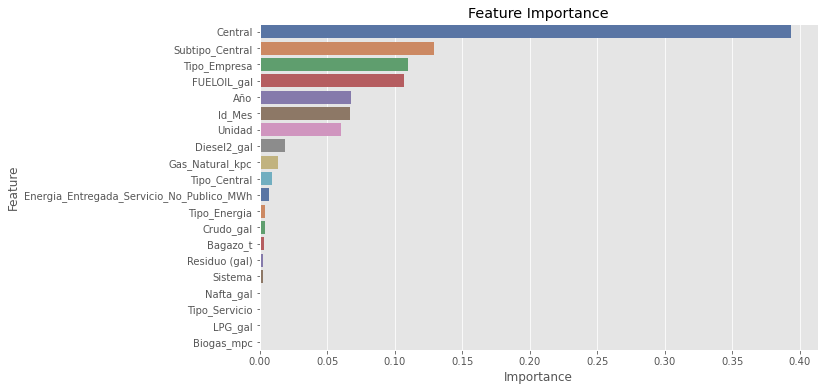

In [123]:
#Procedemos a crear gráficos para visualizar los feature importance usando seaborn. 
#Modelo 1
#se ordenan primero las importancias de la más importante a la menos de forma descendente. 

sorted_feature_importances_1 = feature_importances_1.sort_values('importance', ascending=False)

#procedemos con el gráfico 

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_feature_importances_1['importance'], y=sorted_feature_importances_1['feature'], palette='deep')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

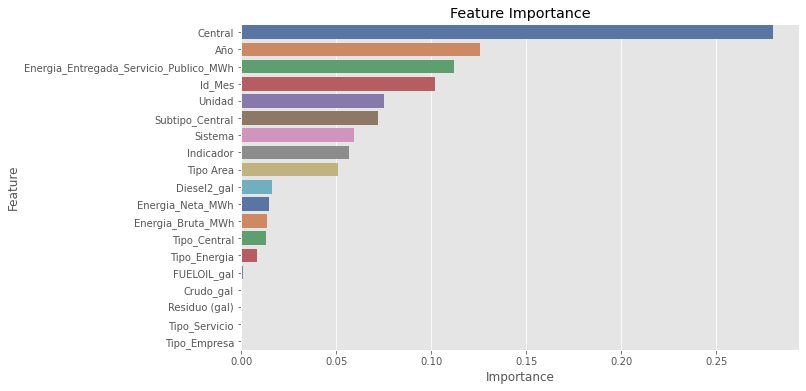

In [124]:
#Procedemos a crear gráficos para visualizar los feature importance usando seaborn. 
#Modelo 3
#se ordenan primero las importancias de la más importante a la menos de forma descendente. 

sorted_feature_importances_3 = feature_importances_3.sort_values('importance', ascending=False)

#procedemos con el gráfico 

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_feature_importances_3['importance'], y=sorted_feature_importances_3['feature'], palette='deep')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# SE PROCEDE A ENTRENAR NUEVAMENTE EL MODELO CON LOS FEATURES CON MAYOR RELEVANCIA EN AMBOS CASOS

In [125]:
#Se procede a tomar las 10 y 19 principales características de cada modelo, para validar si los valores de accuracy (exactitud) y 
#desviación en ambos modelos se ajustan mejor con las predicciones. Se efectua para ambos modelos. 
top_features_1 = feature_importances_1['feature'].head(15).tolist()
top_features_3 = feature_importances_3['feature'].head(10).tolist()

In [126]:
#se generan nuevos predictores de entrenamiento y prueba para ambos modelos con las características seleccionadas para conjunto 1
X1_train_selected = X1_train[top_features_1]
X1_test_selected = X1_test[top_features_1]
#se generan nuevos predictores de entrenamiento y prueba para ambos modelos con las características seleccionadas para conjunto 3
X3_train_selected = X3_train[top_features_3]
X3_test_selected = X3_test[top_features_3]

In [127]:
#se crean nuevamente los modelos de regresión con los features seleccionados modelo 1
rf_regressor_1_selected=RandomForestRegressor()

In [128]:
rf_regressor_1_selected.fit(X1_train_selected, Y1_train)

RandomForestRegressor()

In [129]:
#se crean nuevamente los modelos de regresión con los features seleccionados modelo 3
rf_regressor_3_selected=RandomForestRegressor()

In [130]:
rf_regressor_3_selected.fit(X3_train_selected, Y3_train)

RandomForestRegressor()

# PREDICCIONES CON LOS NUEVOS FEATURES MÁS IMPORTANTES

In [131]:
#predicción modelo 1
Y1_pred_selected = rf_regressor_1_selected.predict(X1_test_selected)
#visualizamos las predicciones
Y1_pred_selected

array([1.50136571e+01, 0.00000000e+00, 1.07328896e+03, ...,
       2.88615274e+04, 3.65122524e+00, 5.88149974e+02])

In [132]:
#predicción modelo 3
Y3_pred_selected = rf_regressor_3_selected.predict(X3_test_selected)
#visualizamos las predicciones
Y3_pred_selected

array([0.9534    , 0.91781556, 0.981293  , ..., 0.92819188, 0.9804    ,
       0.89417948])

# SCORING Y PRECISIÓN CON EL MODELO AJUSTADO

In [133]:
#Error absoluto medio para el modelo 1
mae_1_selected = mean_absolute_error(Y1_test, Y1_pred_selected)
print('El error absoluto medio es: ', mae_1_selected)

El error absoluto medio es:  437.42138516849076


In [134]:
#Coeficiente de determinación modelo 1
#Mejora el ceficiente del modelo al usar los 15 principales feature importance 
r2_1_selected = r2_score(Y1_test, Y1_pred_selected)
print('El coeficiente de determinación es: ', r2_1_selected)

El coeficiente de determinación es:  0.8961312887979406


In [135]:
#Error absoluto medio para el modelo 3
mae_3_selected = mean_absolute_error(Y3_test, Y3_pred_selected)
print('El error absoluto medio es: ', mae_3_selected)

El error absoluto medio es:  0.031249734482662436


In [136]:
#Coeficiente de determinación modelo 3
#Mejora el cooeficiente del modelo al usar los 10 principales feature importance
r2_3_selected = r2_score(Y3_test, Y3_pred_selected)
print('El coeficiente de determinación es: ', r2_3_selected)

El coeficiente de determinación es:  0.9024970425054354


# GRÁFICO DE DISPERSIÓN (SCATTER PLOT) PARA EVALUAR AMBOS MODELOS, CON EL AJUSTE POR FEATURE IMPORTANCE

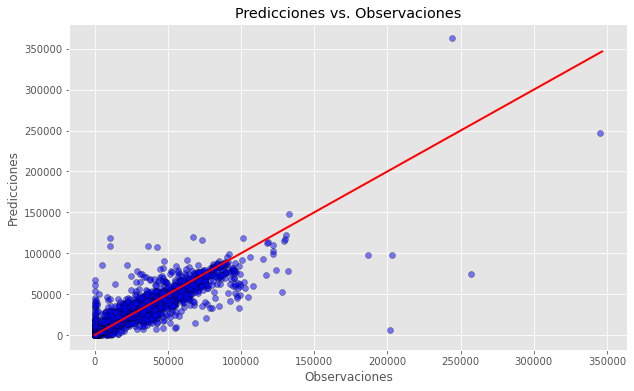

In [137]:
#Gráfico de dispersión modelo 1. 
plt.figure(figsize=(10,6))
plt.scatter(Y1_test, Y1_pred_selected, alpha=0.5, c="blue", marker="o", edgecolors="k")
plt.xlabel('Observaciones')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Observaciones')

min_value = min(min(Y1_test), min(Y1_pred))
max_value = max(max(Y1_test), max(Y1_pred))
plt.plot([min_value, max_value], [min_value, max_value], 'r', linestyle='-', linewidth=2)

plt.show()

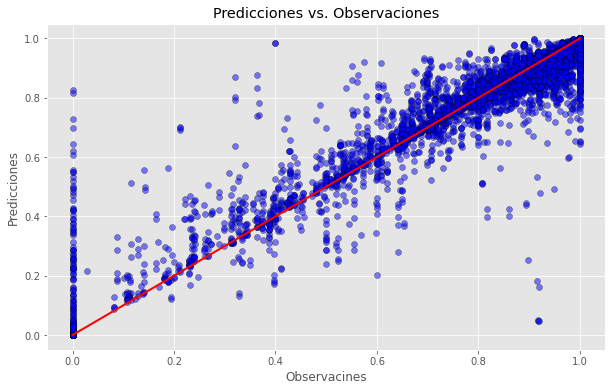

In [138]:
#Gráfico de dispersión modelo 3 con características seleccionadas. 
plt.figure(figsize=(10,6))
plt.scatter(Y3_test, Y3_pred_selected, alpha=0.5, c="blue", marker="o", edgecolors="k")
plt.xlabel('Observacines')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Observaciones')

min_value = min(min(Y3_test), min(Y3_pred_selected))
max_value = max(max(Y3_test), max(Y3_pred_selected))
plt.plot([min_value, max_value], [min_value, max_value], 'r', linestyle='-', linewidth=2)

plt.show()

# COMPARACIÓN DEL MODELO CON OTROS MODELOS ENSEMBLED DE REGRESIÓN

In [139]:
#Importamos librerías adicionales para modelos complementarios y efectuar una predicción individual con un análisis más robuto 
#al previamente efectuado. Modelo 1 y 3
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [140]:
#Creamos y ajustamos modelos individuales para los modelos 1 y 3
rf1 = RandomForestRegressor()
gb1 = GradientBoostingRegressor()
lr1 = LinearRegression()

rf3 = RandomForestRegressor()
gb3 = GradientBoostingRegressor()
lr3 = LinearRegression()

In [141]:
#Ajustamos los modelos con los conjuntos de entrenamiento de los datos previo al feature importance. 
#Modelo 1
rf1.fit(X1_train, Y1_train)

RandomForestRegressor()

In [142]:
#Ajustamos los modelos con los conjuntos de entrenamiento de los datos previo al feature importance. 
#Modelo 1
gb1.fit(X1_train, Y1_train)

GradientBoostingRegressor()

In [143]:
#Ajustamos los modelos con los conjuntos de entrenamiento de los datos previo al feature importance. 
#Modelo 1
lr1.fit(X1_train, Y1_train)

LinearRegression()

In [144]:
#Ajustamos los modelos con los conjuntos de entrenamiento de los datos previo al feature importance. 
#Modelo 3
rf3.fit(X3_train_selected, Y3_train)

RandomForestRegressor()

In [145]:
#Ajustamos los modelos con los conjuntos de entrenamiento de los datos previo al feature importance. 
#Modelo 3
gb3.fit(X3_train_selected, Y3_train)

GradientBoostingRegressor()

In [146]:
#Ajustamos los modelos con los conjuntos de entrenamiento de los datos previo al feature importance. 
#Modelo 3
lr3.fit(X3_train_selected, Y3_train)

LinearRegression()

In [147]:
#Creamos y ajustamos el voting regressor para el modelo 1
voting1 = VotingRegressor(estimators=[('rf1', rf1), ('gb1', gb1), ('lr1', lr1)])
voting1.fit(X1_train, Y1_train)

VotingRegressor(estimators=[('rf1', RandomForestRegressor()),
                            ('gb1', GradientBoostingRegressor()),
                            ('lr1', LinearRegression())])

In [148]:
#Creamos y ajustamos el voting regressor para el modelo 3
voting3 = VotingRegressor(estimators=[('rf3', rf3), ('gb3', gb3), ('lr3', lr3)])
voting3.fit(X3_train_selected, Y3_train)

VotingRegressor(estimators=[('rf3', RandomForestRegressor()),
                            ('gb3', GradientBoostingRegressor()),
                            ('lr3', LinearRegression())])

In [149]:
#Cálculamos las predicciones para cada modelo y el voting regressor en el modelo 1
Y1_rf1 = rf1.predict(X1_test)
Y1_gb1 = gb1.predict(X1_test)
Y1_lr1 = lr1.predict(X1_test)
Y1_voting1 = voting1.predict(X1_test)

In [150]:
#Cálculamos las predicciones para cada modelo y el voting regressor en el modelo 3
Y3_rf3 = rf3.predict(X3_test_selected)
Y3_gb3 = gb3.predict(X3_test_selected)
Y3_lr3 = lr3.predict(X3_test_selected)
Y3_voting3 = voting3.predict(X3_test_selected)

In [151]:
#Visualizamos las predicciones modelo 1
Y1_rf1

array([1.39640277e+01, 0.00000000e+00, 1.07698944e+03, ...,
       2.74954924e+04, 3.30213636e+00, 6.05243766e+02])

In [152]:
#Visualizamos las predicciones modelo 1
Y1_gb1

array([  533.1924992 ,   -65.29233865,  3290.41683553, ...,
       22334.20343414,  1046.95321483,   196.6109936 ])

In [153]:
#Visualizamos las predicciones modelo 1
Y1_lr1

array([  211.72385213,  -834.62572443,  2129.69049103, ...,
       10907.06304024,   597.97177949,  1378.34232063])

In [154]:
#Visualizamos las predicciones modelo 1
Y1_voting1

array([  252.88126019,  -299.97268769,  2163.5402845 , ...,
       20744.6107506 ,   549.44115854,   726.85216467])

In [155]:
#Visualizamos las predicciones modelo 3
Y3_rf3

array([0.9534    , 0.92871667, 0.980511  , ..., 0.92548772, 0.980183  ,
       0.88860623])

In [156]:
#Visualizamos las predicciones modelo 3
Y3_gb3

array([0.92061184, 0.8943977 , 0.94979319, ..., 0.93020306, 0.88123847,
       0.90346049])

In [157]:
#Visualizamos las predicciones modelo 3
Y3_lr3

array([0.92816417, 0.87684142, 0.90538252, ..., 0.93481535, 0.8782402 ,
       0.86879298])

In [158]:
#Visualizamos las predicciones modelo 3
Y3_voting3

array([0.934094  , 0.89886199, 0.94551224, ..., 0.92943518, 0.91331789,
       0.8878926 ])

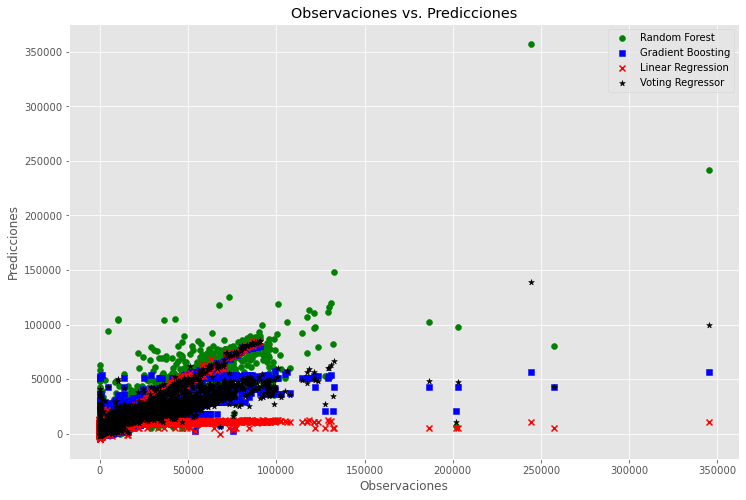

In [159]:
#procedemos a graficar predicciones contra las observaciones en el modelo 1 
plt.figure(figsize=(12, 8))

plt.scatter(Y1_test, Y1_rf1, c='g', marker='o', label='Random Forest')
plt.scatter(Y1_test, Y1_gb1, c='b', marker='s', label='Gradient Boosting')
plt.scatter(Y1_test, Y1_lr1, c='r', marker='x', label='Linear Regression')
plt.scatter(Y1_test, Y1_voting1, c='k', marker='*', label='Voting Regressor')

plt.xlabel('Observaciones')
plt.ylabel('Predicciones')
plt.legend(loc='best')
plt.title('Observaciones vs. Predicciones')

plt.show()

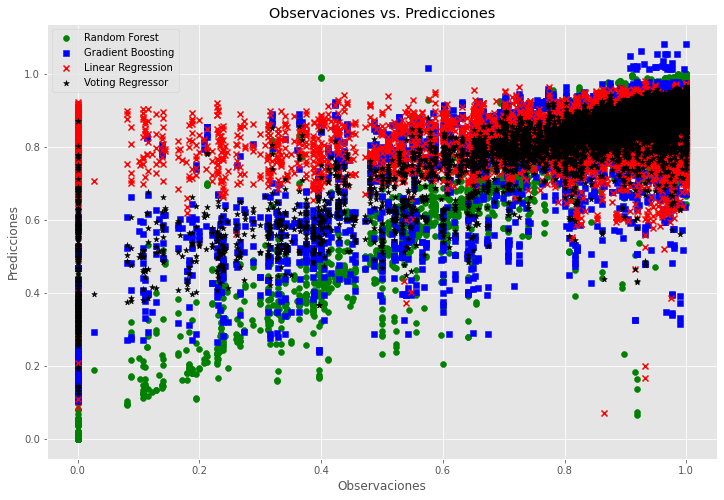

In [160]:
#procedemos a graficar predicciones contra las observaciones en el modelo 3 
plt.figure(figsize=(12, 8))

plt.scatter(Y3_test, Y3_rf3, c='g', marker='o', label='Random Forest')
plt.scatter(Y3_test, Y3_gb3, c='b', marker='s', label='Gradient Boosting')
plt.scatter(Y3_test, Y3_lr3, c='r', marker='x', label='Linear Regression')
plt.scatter(Y3_test, Y3_voting3, c='k', marker='*', label='Voting Regressor')

plt.xlabel('Observaciones')
plt.ylabel('Predicciones')
plt.legend(loc='best')
plt.title('Observaciones vs. Predicciones')

plt.show()

# SCORING DEL GRADIENT VOOTING REGRESSOR

In [161]:
#SE CALCULA EL ERROR ABSOLUTO MEDIO MODELO 1 ENSEMBLED
mae_voting_1 = mean_absolute_error(Y1_test, Y1_voting1)
print('El error absoluto medio es: ', mae_voting_1)

El error absoluto medio es:  1558.4349117625318


In [162]:
#SE CALCULA EL COEFICIENTE DE DETERMINACIÓN PARA EL MODELO 1 ENSEMBLED
#SE OBSERVA QUE TIENE UN MAYR NIVEL DE DETERMINACIÓN QUE EN EL CASO DEL RANDOM FOREST REGRESSOR. 
r2_voting_1 = r2_score(Y1_test, Y1_voting1)
print('El coeficiente de determinación es: ', r2_voting_1)

El coeficiente de determinación es:  0.7447265581440897


In [163]:
#SE CALCULA EL ERROR ABSOLUTO MEDIO MODELO 3 ENSEMBLED
mae_voting_3 = mean_absolute_error(Y3_test, Y3_voting3)
print('El error absoluto medio es: ', mae_voting_3)

El error absoluto medio es:  0.09227999425719279


In [164]:
#SE CALCULA EL COEFICIENTE DE DETERMINACIÓN PARA EL MODELO 3 ENSEMBLED
#SE OBSERVA QUE EL MODELO RANDOM FOREST, TIENE UN MAYOR NIVEL DE DETERMINACIÓN.
r2_voting_3 = r2_score(Y3_test, Y3_voting3)
print('El coeficiente de determinación es: ', r2_voting_3)

El coeficiente de determinación es:  0.6533559464207965


# SCORING DEL RESTO DE MODELOS

In [165]:
#SE CALCULA EL ERROR ABSOLUTO MEDIO MODELO 1 CON OBSERVACIONES
mae_rf1 = mean_absolute_error(Y1_test, Y1_rf1)
print('El error absoluto medio es: ', mae_rf1)

El error absoluto medio es:  430.38119713464516


In [166]:
#SE CALCULA EL COEFICIENTE DE DETERMINACIÓN PARA EL MODELO 1 ENSEMBLED
#SE OBSERVA QUE TIENE UN MAYR NIVEL DE DETERMINACIÓN QUE EN EL CASO DEL RANDOM FOREST REGRESSOR. 
r2_rf1 = r2_score(Y1_test, Y1_rf1)
print('El coeficiente de determinación es: ', r2_rf1)

El coeficiente de determinación es:  0.899216714778613


In [167]:
#SE CALCULA EL ERROR ABSOLUTO MEDIO MODELO 1 CON OBSERVACIONES
mae_rf3 = mean_absolute_error(Y3_test, Y3_rf3)
print('El error absoluto medio es: ', mae_rf3)

El error absoluto medio es:  0.031248106173173286


In [168]:
#SE CALCULA EL COEFICIENTE DE DETERMINACIÓN PARA EL MODELO 1 ENSEMBLED
#SE OBSERVA QUE TIENE UN MAYR NIVEL DE DETERMINACIÓN QUE EN EL CASO DEL RANDOM FOREST REGRESSOR. 
r2_rf3 = r2_score(Y3_test, Y3_rf3)
print('El coeficiente de determinación es: ', r2_rf3)

El coeficiente de determinación es:  0.8998570688782455


In [169]:
#SE CALCULA EL ERROR ABSOLUTO MEDIO MODELO 1 CON OBSERVACIONES
mae_gb1 = mean_absolute_error(Y1_test, Y1_gb1)
print('El error absoluto medio es: ', mae_gb1)

El error absoluto medio es:  1818.138074883251


In [170]:
#SE CALCULA EL COEFICIENTE DE DETERMINACIÓN PARA EL MODELO 1 ENSEMBLED
#SE OBSERVA QUE TIENE UN MAYR NIVEL DE DETERMINACIÓN QUE EN EL CASO DEL RANDOM FOREST REGRESSOR. 
r2_gb1 = r2_score(Y1_test, Y1_gb1)
print('El coeficiente de determinación es: ', r2_gb1)

El coeficiente de determinación es:  0.6860149663003159


In [171]:
#SE CALCULA EL ERROR ABSOLUTO MEDIO MODELO 1 CON OBSERVACIONES
mae_gb3 = mean_absolute_error(Y3_test, Y3_gb3)
print('El error absoluto medio es: ', mae_gb3)

El error absoluto medio es:  0.10652146671543192


In [172]:
#SE CALCULA EL COEFICIENTE DE DETERMINACIÓN PARA EL MODELO 1 ENSEMBLED
#SE OBSERVA QUE TIENE UN MAYR NIVEL DE DETERMINACIÓN QUE EN EL CASO DEL RANDOM FOREST REGRESSOR. 
r2_gb3 = r2_score(Y3_test, Y3_gb3)
print('El coeficiente de determinación es: ', r2_gb3)

El coeficiente de determinación es:  0.5306793808602521


In [173]:
#SE CALCULA EL ERROR ABSOLUTO MEDIO MODELO 1 CON OBSERVACIONES
mae_lr1 = mean_absolute_error(Y1_test, Y1_lr1)
print('El error absoluto medio es: ', mae_lr1)

El error absoluto medio es:  2917.3037896120977


In [174]:
#SE CALCULA EL COEFICIENTE DE DETERMINACIÓN PARA EL MODELO 1 ENSEMBLED
#SE OBSERVA QUE TIENE UN MAYR NIVEL DE DETERMINACIÓN QUE EN EL CASO DEL RANDOM FOREST REGRESSOR. 
r2_lr1 = r2_score(Y1_test, Y1_lr1)
print('El coeficiente de determinación es: ', r2_lr1)

El coeficiente de determinación es:  0.3050653996716407


In [175]:
#SE CALCULA EL ERROR ABSOLUTO MEDIO MODELO 1 CON OBSERVACIONES
mae_lr3 = mean_absolute_error(Y3_test, Y3_lr3)
print('El error absoluto medio es: ', mae_lr3)

El error absoluto medio es:  0.15316963249788507


In [176]:
#SE CALCULA EL COEFICIENTE DE DETERMINACIÓN PARA EL MODELO 1 ENSEMBLED
#SE OBSERVA QUE TIENE UN MAYR NIVEL DE DETERMINACIÓN QUE EN EL CASO DEL RANDOM FOREST REGRESSOR. 
r2_lr3 = r2_score(Y3_test, Y3_lr3)
print('El coeficiente de determinación es: ', r2_lr3)

El coeficiente de determinación es:  0.07047778097038315


## Comparativo de Modelos

## Modelos de regresión
Se genera un comparativo de los modelos de regresión, de modo que se pueda validar, conforme el ceficiente de determinación y el error absoluto medio, el mejor modelo de regresión para predecir el comportamiento de las variables generamos el comparativo por dataset. Es decir, del dataset 1 y del dataset 3

In [177]:
# Comparativo dataset 1 (random forest, gradient booting regresor, linear regresor y vooting regressr)
models_list = [rf1,gb1,lr1, voting1]
mean_absolute_error =[]
r2_score =[]
for model in models_list:
    predict_test = model.predict(X1_test)
    predict_train = model.predict(X1_train)
    maes = metrics.mean_absolute_error(Y1_test, predict_test)
    rscores = metrics.r2_score(Y1_test, predict_test)
    
    mean_absolute_error.append(maes)
    r2_score.append(rscores)
    
model_compare = pd.DataFrame({
'Models':['rf1','gb1','lr1', 'voting1'],
'mae':mean_absolute_error,
'r2_score':r2_score
})

In [178]:
model_compare.style.background_gradient(cmap='Blues')

,Models,mae,r2_score
0,rf1,430.381197,0.899217
1,gb1,1818.138075,0.686015
2,lr1,2917.303790,0.305065
3,voting1,1558.434912,0.744727


In [179]:
# Comparativo dataset 3 (random forest, gradient booting regresor, linear regresor y vooting regressr)
models_list = [rf3,gb3,lr3, voting3]
mean_absolute_error =[]
r2_score =[]
for model in models_list:
    predict_test = model.predict(X3_test_selected)
    predict_train = model.predict(X3_train_selected)
    maes = metrics.mean_absolute_error(Y3_test, predict_test)
    rscores = metrics.r2_score(Y3_test, predict_test)
    
    mean_absolute_error.append(maes)
    r2_score.append(rscores)
    
model_compare = pd.DataFrame({
'Models':['rf3','gb3','lr3', 'voting3'],
'mae':mean_absolute_error,
'r2_score':r2_score
})

In [180]:
model_compare.style.background_gradient(cmap='Blues')

,Models,mae,r2_score
0,rf3,0.031248,0.899857
1,gb3,0.106521,0.530679
2,lr3,0.153170,0.070478
3,voting3,0.092280,0.653356


Una vez comparads los modelos, el rf1 que es el modelo del random forest regressor, observamos que es el mejor modelo para predecir el comportamiento de los datos usados. Por tanto, se procede a mantener este modelo por tener el MAE más bajo y el r2 más alto. 

## Generación de un nuevo potencial modelo de clasificacion mediante el random forest clasifier con la agrupación de las empresas de acuerdo a su volumen de energía producida así como a su indicador.

In [181]:
#se visualiza las variables del df3 para validar los datos y construir la variable independiente 
df3.dtypes

Año                                         int64
Mes                                        object
Id_Mes                                      int64
Id_Empresa                                  int64
Empresa                                    object
Tipo_Empresa                               object
Id_Central                                  int64
Central                                    object
Unidad                                     object
Tipo_Central                               object
Subtipo_Central                            object
Tipo_Energia                               object
Tipo_Servicio                              object
Sistema                                    object
Energia_Bruta_MWh                         float64
Consumo_Auxiliare_ Unidades_MWh           float64
Energia_Neta_MWh                          float64
FUELOIL_gal                               float64
Diesel2_gal                               float64
Crudo_gal                                 float64


In [182]:
#SE AGRUPA EL CONJUNTO DE DATOS INDEPENDIENTES POR LAS VARIABLES QUE SE USARAN EN EL MODELO
#'Central', 'Unidad', 'Tipo_Central', 'Subtipo_Central', 'Tipo_Energia', 'Tipo_Servicio', 'Sistema', 'Tipo Area'
df3groups = df3.groupby(['Empresa', 'Tipo_Servicio', 'Central', 'Unidad', 'Tipo_Central', 'Subtipo_Central', 'Tipo_Energia', 
                         'Sistema', 'Tipo Area', 'Tipo_Empresa']).agg({'FUELOIL_gal': 'mean', 'Energia_Neta_MWh': 'mean',
'Diesel2_gal': 'mean', 'Crudo_gal': 'mean', 'Residuo (gal)': 'mean', 'Energia_Entregada_Servicio_Publico_MWh': 'mean',
                                                                       'Valor_Indicador': 'mean'}).reset_index()

df3groups.shape

(414, 17)

In [183]:
#Se genera una nueva variable para categorizar a las empresas en función de su producción e índice de efectividad, como se 
#muestran en la parte del análisis exploratorio. 

mediana_energia = df3groups['Energia_Neta_MWh'].median()
mediana_efectividad = df3groups['Valor_Indicador'].median()

#función para asegnar categorías por cuadrante

def asignar_categoria(row):    

    if row['Energia_Neta_MWh'] >= mediana_energia and row['Valor_Indicador'] >= mediana_efectividad: 
        return 'Alta producción y alta efectividad'
    elif row['Energia_Neta_MWh'] >= mediana_energia and row['Valor_Indicador'] < mediana_efectividad: 
        return 'Alta producción y baja efectividad'
    elif row['Energia_Neta_MWh'] < mediana_energia and row['Valor_Indicador'] >= mediana_efectividad: 
        return 'Baja producción y alta efectividad'
    else: 
        return 'Baja producción y baja efectividad'

# Creamos la variable objetivo con la nueva función


df3_category = df3groups.apply(asignar_categoria, axis=1)
df3_category.shape

(414,)

In [184]:
#Creamos las variables independientes y la dependiente para proceder con el modelo de clasificación
XC3 = df3groups.drop(['Empresa', 'Energia_Neta_MWh', 'Valor_Indicador'], axis=1)
YC3 = df3_category

In [185]:
XC3.shape

(414, 14)

In [186]:
YC3.shape

(414,)

In [187]:
YC3.value_counts()

Alta producción y alta efectividad    116
Baja producción y baja efectividad    115
Alta producción y baja efectividad     92
Baja producción y alta efectividad     91
dtype: int64

In [188]:
XC3.dtypes

Tipo_Servicio                              object
Central                                    object
Unidad                                     object
Tipo_Central                               object
Subtipo_Central                            object
Tipo_Energia                               object
Sistema                                    object
Tipo Area                                  object
Tipo_Empresa                               object
FUELOIL_gal                               float64
Diesel2_gal                               float64
Crudo_gal                                 float64
Residuo (gal)                             float64
Energia_Entregada_Servicio_Publico_MWh    float64
dtype: object

In [189]:
# creamos conjuntos de entrenamiento y prueba
XC3_train, XC3_test, YC3_train, YC3_test = train_test_split(XC3, YC3, test_size = 0.3)

## FEATURE ENGINERING

In [190]:
encoder_class =ce.OrdinalEncoder(cols=['Tipo_Servicio', 'Central', 'Unidad', 'Tipo_Central', 'Subtipo_Central', 'Tipo_Energia', 
                                       'Sistema', 'Tipo Area', 'Tipo_Empresa'])

In [191]:
XC3_train = encoder_class.fit_transform(XC3_train)

XC3_test = encoder_class.transform(XC3_test)

In [192]:
XC3_train.head()

,Tipo_Servicio,Central,Unidad,Tipo_Central,Subtipo_Central,Tipo_Energia,Sistema,Tipo Area,Tipo_Empresa,FUELOIL_gal,Diesel2_gal,Crudo_gal,Residuo (gal),Energia_Entregada_Servicio_Publico_MWh
108,1,1,1,1,1,1,1,1,1,0.0,3382.599444,0.0,0.0,29.585447
230,1,2,2,1,1,1,1,1,1,0.0,7996.753425,0.0,0.0,103.403733
159,1,3,3,2,2,2,2,2,1,0.0,0.000000,0.0,0.0,454.849096
412,1,4,4,2,2,2,2,1,1,0.0,0.000000,0.0,0.0,211.351652
78,1,5,5,1,1,1,1,1,1,0.0,9682.742222,0.0,0.0,183.332658


In [193]:
XC3_test.head()

,Tipo_Servicio,Central,Unidad,Tipo_Central,Subtipo_Central,Tipo_Energia,Sistema,Tipo Area,Tipo_Empresa,FUELOIL_gal,Diesel2_gal,Crudo_gal,Residuo (gal),Energia_Entregada_Servicio_Publico_MWh
35,1,8.0,23.0,1,3,1,2,2,1,8672.464286,52672.346250,0.0,0.0,519.309920
371,1,29.0,15.0,2,2,2,2,2,1,0.000000,0.000000,0.0,0.0,1656.832311
44,1,17.0,72.0,1,1,1,2,1,1,0.000000,15718.334000,0.0,0.0,89.224125
396,1,36.0,69.0,1,1,1,2,1,1,0.000000,6724.361685,0.0,0.0,96.403929
11,1,25.0,-1.0,1,1,1,1,2,1,0.000000,0.000000,0.0,0.0,1.299208


# RANDOM FOREST CLASSIFIER CON PARÁMETROS POR DEFECTO

In [194]:
#Importams libreria
from sklearn.ensemble import RandomForestClassifier

In [195]:
#Instanciamos algorítmo
rfc = RandomForestClassifier()

In [196]:
#Entrenamos el modelo el modelo
rfc.fit(XC3_train, YC3_train)

RandomForestClassifier()

In [197]:
#Predecimos resultados del modelo
YC3_pred = rfc.predict(XC3_test)
YC3_pred

array(['Alta producción y baja efectividad',
       'Alta producción y alta efectividad',
       'Alta producción y alta efectividad',
       'Baja producción y alta efectividad',
       'Baja producción y baja efectividad',
       'Baja producción y alta efectividad',
       'Alta producción y baja efectividad',
       'Alta producción y alta efectividad',
       'Alta producción y baja efectividad',
       'Alta producción y baja efectividad',
       'Alta producción y alta efectividad',
       'Alta producción y alta efectividad',
       'Baja producción y baja efectividad',
       'Baja producción y alta efectividad',
       'Alta producción y alta efectividad',
       'Baja producción y baja efectividad',
       'Baja producción y alta efectividad',
       'Alta producción y alta efectividad',
       'Alta producción y alta efectividad',
       'Baja producción y baja efectividad',
       'Alta producción y alta efectividad',
       'Baja producción y alta efectividad',
       'Ba

## VALIDAMOS EL PRIMER INDICADOR DEL SCORING DEL MODELO

In [198]:
#Importamos libreria
from sklearn.metrics import accuracy_score

In [199]:
#Score del mdelo
print('La precisión del modelo con 10 árboles de decision es : {0:0.4f}'. format(accuracy_score(YC3_test, YC3_pred)))

La precisión del modelo con 10 árboles de decision es : 0.8000


In [200]:
#medimos el f1 del modelo
#medimos el f1 score
rfc_score = metrics.f1_score(YC3_test, YC3_pred, average='weighted')
print('El f1 del modelo es con 10 árboles de decisión: ', rfc_score)

El f1 del modelo es con 10 árboles de decisión:  0.7987517355792666


## INCLUIMOS UN AUMENTO DE ESTIMADORES DEL MODELO, 100 VECES MÁS
## PARA INCREMENTAR EL ACCURACY DEL MODELO

In [201]:
#Llamamos al modelo con 1000 estimadores
rfc_100 = RandomForestClassifier(n_estimators=1000)

In [202]:
#Entrenamos el modelo
rfc_100.fit(XC3_train, YC3_train)

RandomForestClassifier(n_estimators=1000)

In [203]:
#Reralizamos las predicciones
YC3_pred_100 = rfc_100.predict(XC3_test)
YC3_pred_100

array(['Alta producción y baja efectividad',
       'Alta producción y alta efectividad',
       'Alta producción y alta efectividad',
       'Baja producción y alta efectividad',
       'Baja producción y baja efectividad',
       'Baja producción y alta efectividad',
       'Alta producción y baja efectividad',
       'Alta producción y alta efectividad',
       'Alta producción y baja efectividad',
       'Alta producción y baja efectividad',
       'Alta producción y alta efectividad',
       'Alta producción y alta efectividad',
       'Baja producción y baja efectividad',
       'Baja producción y alta efectividad',
       'Alta producción y alta efectividad',
       'Baja producción y baja efectividad',
       'Baja producción y alta efectividad',
       'Alta producción y alta efectividad',
       'Alta producción y alta efectividad',
       'Baja producción y baja efectividad',
       'Alta producción y alta efectividad',
       'Baja producción y alta efectividad',
       'Ba

## SCORING MODELO CON 1000 ESTIMADORES

In [204]:
print('La precisión del modelo con 1000 árboles de decision es : {0:0.4f}'. format(accuracy_score(YC3_test, YC3_pred_100)))

La precisión del modelo con 1000 árboles de decision es : 0.7920


## ENCONTRAMOS LOS IMPORTANT FEATURES AL MODELO DE CLASIFICACIÓN

In [205]:
#Creamos un clasificador con 1000 estimadores
clf = RandomForestClassifier(n_estimators=1000)

In [206]:
clf.fit(XC3_train, YC3_train)

RandomForestClassifier(n_estimators=1000)

In [207]:
#Observamos los importante features
feature_scores = pd.Series(clf.feature_importances_, index=XC3_train.columns).sort_values(ascending=False)
feature_scores

Energia_Entregada_Servicio_Publico_MWh    0.278927
Diesel2_gal                               0.163801
Central                                   0.158416
Unidad                                    0.154633
Tipo Area                                 0.069115
Subtipo_Central                           0.048697
Tipo_Central                              0.040379
Sistema                                   0.035866
Tipo_Energia                              0.023660
FUELOIL_gal                               0.014951
Crudo_gal                                 0.006078
Residuo (gal)                             0.005476
Tipo_Servicio                             0.000000
Tipo_Empresa                              0.000000
dtype: float64

## VISUALIZAMOS EL FEATURE SCORE

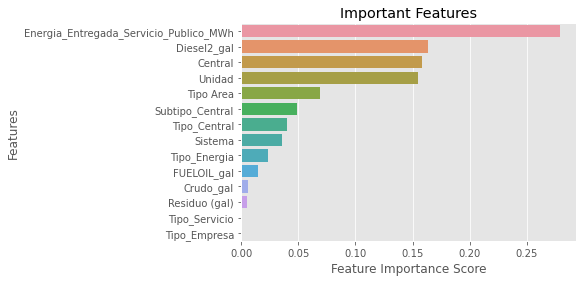

In [208]:
#Creamos una gráfica de barras
sns.barplot(x=feature_scores, y=feature_scores.index)

#Añadimos títulos

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

#Añadimos título a la gráfica

plt.title("Important Features")



# Visualizamos el gráfico

plt.show()

## GENERAMOS UN NUEVO MODELO DESCARTANDO LAS DOS ÚLTIMAS CARACTERÍSTICAS EN ORDEN DE IMPORTANCIA

In [209]:
#Escogemos variables
XC3_SELECTED = XC3.drop(['Tipo_Servicio', 'Tipo_Empresa'], axis=1)
XC3_SELECTED.head()

,Central,Unidad,Tipo_Central,Subtipo_Central,Tipo_Energia,Sistema,Tipo Area,FUELOIL_gal,Diesel2_gal,Crudo_gal,Residuo (gal),Energia_Entregada_Servicio_Publico_MWh
0,Chimbo,U1,Hidráulica,Hidráulica,Renovable,S.N.I,Rural,0.0,0.0,0.0,0.0,80.075203
1,Chimbo,U1,Hidráulica,Hidráulica,Renovable,S.N.I,Urbano,0.0,0.0,0.0,0.0,80.075203
2,Chimbo,U2,Hidráulica,Hidráulica,Renovable,S.N.I,Rural,0.0,0.0,0.0,0.0,82.239397
3,Chimbo,U2,Hidráulica,Hidráulica,Renovable,S.N.I,Urbano,0.0,0.0,0.0,0.0,82.239397
4,Guaranda,U1,Térmica,Térmica MCI,No Renovable,S.N.I,Rural,0.0,0.0,0.0,0.0,0.000000


In [210]:
#Conformamos conjuntos
XC3_SELECTED_train, XC3_SELECTED_test, YC3_train, YC3_test = train_test_split(XC3_SELECTED, YC3, test_size = 0.3)

In [211]:
#Dumificación rápida de variables
encoder_class_selected =ce.OrdinalEncoder(cols=['Central', 'Unidad', 'Tipo_Central', 'Subtipo_Central', 'Tipo_Energia', 
                                       'Sistema', 'Tipo Area'])

In [212]:
XC3_SELECTED_train = encoder_class_selected.fit_transform(XC3_SELECTED_train)

XC3_SELECTED_test = encoder_class_selected.transform(XC3_SELECTED_test)

In [213]:
#CREAMOS EL MODELO CON 1000 ESTIMADRES DIRECTAMENTE
rfc_selected = RandomForestClassifier(n_estimators=1000)

In [214]:
#Entrenamos el modelo
rfc_selected.fit(XC3_SELECTED_train, YC3_train)

RandomForestClassifier(n_estimators=1000)

In [215]:
#Predicciones
YC3_SELECTED_PRED = rfc_selected.predict(XC3_SELECTED_test)
YC3_SELECTED_PRED

array(['Alta producción y baja efectividad',
       'Baja producción y baja efectividad',
       'Alta producción y baja efectividad',
       'Alta producción y alta efectividad',
       'Baja producción y alta efectividad',
       'Baja producción y alta efectividad',
       'Alta producción y baja efectividad',
       'Alta producción y baja efectividad',
       'Alta producción y alta efectividad',
       'Baja producción y alta efectividad',
       'Alta producción y baja efectividad',
       'Baja producción y alta efectividad',
       'Alta producción y alta efectividad',
       'Baja producción y baja efectividad',
       'Alta producción y alta efectividad',
       'Alta producción y alta efectividad',
       'Baja producción y baja efectividad',
       'Baja producción y baja efectividad',
       'Alta producción y alta efectividad',
       'Baja producción y baja efectividad',
       'Alta producción y baja efectividad',
       'Alta producción y alta efectividad',
       'Ba

In [216]:
print('Precisión del modelo eliminando variables de ruido : {0:0.4f}'. format(accuracy_score(YC3_test, YC3_SELECTED_PRED)))

Precisión del modelo eliminando variables de ruido : 0.8560


In [217]:
rfc_score_1000 = metrics.f1_score(YC3_test, YC3_SELECTED_PRED, average='weighted')
print('El f1 del modelo es con 1000 árboles de decisión: ', rfc_score_1000)

El f1 del modelo es con 1000 árboles de decisión:  0.8567885061798106


## GENERAMOS UNA MATRIZ DE CONFUSIÓN PARA EL MODELO AJUSTADO FINAL

In [218]:
#lIBRERIAS
from sklearn.metrics import confusion_matrix

In [219]:
#MATRIZ DE CONFUSIÓN
cm = confusion_matrix(YC3_test, YC3_SELECTED_PRED)

print('Confusion matrix\n\n', cm)

#Teoría
#True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the 
#observation actually belongs to that class.

#True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the 
#observation actually does not belong to that class.

#False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the 
#observation actually does not belong to that class. This type of error is called Type I error.

#False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the 
#observation actually belongs to that class. This is a very serious error and it is called Type II error.

Confusion matrix

 [[34  3  2  0]
 [ 3 21  0  2]
 [ 1  0 22  2]
 [ 0  4  1 30]]


## REPORTE DE CLASIFICACIÓN PARA LOS DATOS

In [220]:
#lIBRERIA
from sklearn.metrics import classification_report

In [221]:
#REPORTE DE CLASIFICACIÓN
#TEORÍA
#Classification report is another way to evaluate the classification model performance. It displays the precision, 
#recall, f1 and support scores for the model. I have described these terms in later.

print(classification_report(YC3_test, YC3_SELECTED_PRED))

                                    precision    recall  f1-score   support

Alta producción y alta efectividad       0.89      0.87      0.88        39
Alta producción y baja efectividad       0.75      0.81      0.78        26
Baja producción y alta efectividad       0.88      0.88      0.88        25
Baja producción y baja efectividad       0.88      0.86      0.87        35

                          accuracy                           0.86       125
                         macro avg       0.85      0.85      0.85       125
                      weighted avg       0.86      0.86      0.86       125



# INCLUSIÓN DE MODELOS DE APRENDIZAJE AUTOMÁTICO ADICIONALES
# MODELOS DE REGRESIÓN PARA LAS VARIABLES CONTINUAS

Implementaremos iun modelo de Redes Neuronales supervisidaras (perceptron) para efectuar una predicción sobre un modelo de regresión con los conjuntos previamente definidos. Realizaremos una evaluación del performance de estos modelos usando la librería SKLEARN para compararlo con el random forest

In [222]:
#librerias
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [223]:
#escalamos los conjuntos de entrenamiento en el modelo 1 y 3 que puedan ser usadas por las redes neuronales y el perceptron.
scaler = StandardScaler()

In [224]:
#escalamos conjuntos
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

X3_train_scaled = scaler.fit_transform(X3_train)
X3_test_scaled = scaler.transform(X3_test)

In [225]:
#creamos el modelo según los parámetros definidos en sklearn1

model1 = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', max_iter=500, random_state=42) 

In [226]:
#creamos el modelo según los parámetros definidos en sklearn1

model3 = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', max_iter=500, random_state=42) 

In [227]:
#Ajustamos y entrenamos el modelo al conjunto 1
model1.fit(X1_train_scaled, Y1_train)

MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=500, random_state=42)

In [228]:
#Ajustamos y entrenamos el modelo al conjunto 3
model3.fit(X3_train_scaled, Y3_train)

MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=500, random_state=42)

In [229]:
predictions_1 = model1.predict(X1_test_scaled)
predictions_1

array([   90.00790784,    68.9806643 ,   740.26574306, ...,
       18096.55098362,    54.5165117 ,   291.55963931])

In [230]:
predictions_3 = model3.predict(X3_test_scaled)
predictions_3

array([0.91079321, 0.84836931, 0.94373384, ..., 0.83968886, 0.77737093,
       0.89324955])

# SCORING MODELO REDES NEURONALES

In [231]:
#modelo 1
mse_1 = mean_squared_error(Y1_test, predictions_1)
print('MSE: ', mse_1)

MSE:  36498574.329268


In [232]:
#R2 
r2_perceptron1 = r2_score(Y1_test, predictions_1)
print('r2 ', r2_perceptron1)

r2  0.6306519118432851


In [233]:
#modelo 3
mse_3 = mean_squared_error(Y3_test, predictions_3)
print('MSE: ', mse_3)

MSE:  0.028496982640993228


In [234]:
#R2 
r2_perceptron3 = r2_score(Y3_test, predictions_3)
print('r2 ', r2_perceptron3)

r2  0.45425048076602614


# INCLUSIÓN DE MODELOS DE APRENDIZAJE AUTOMÁTICO ADICIONALES
# MODELOS DE CLASIFICACIÓN VARIABLES AJUSTADAS DESCENSO DE GRADIENTE EN CLASIFICACIÓN

In [235]:
# Importamos librerías
import xgboost as xgb

In [236]:
#Ingresamos el modelo ensembled de descenso de gradiente, con un learning rate de 0.01 para tener mayor nivel de precisión. 
Xgboost_model = xgb.XGBClassifier(learning_rate=0.01,verbosity=0)

In [237]:
# para poder ingresar la variable a predecir, debemos generar una codificación numérica en el modelo. Usamos el encoder de de
#sklearn para asignar los valores de la siguiente forma. 
#['Alta producción y alta efectividad' 'Alta producción y baja efectividad''Baja producción y alta efectividad' 
#'Baja producción y baja efectividad'] por [0 1 2 3] en el mismo orden. 
from sklearn.preprocessing import LabelEncoder

In [238]:
#creamos las etiquetas
label_encoder = LabelEncoder()
#codificamos las etiquetas
YC3_train_encoded = label_encoder.fit_transform(YC3_train)

In [239]:
#creamos etiquetas para scoring del modelo. 
YC3_test_encoded = label_encoder.fit_transform(YC3_test)

In [240]:
# Ajuste del modelo para los datos clasificados. 
Xgboost_model.fit(XC3_train, YC3_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [241]:
#predicciones del modelo
predict_train_Xgb = Xgboost_model.predict(XC3_train)
predict_train_Xgb 

array([1, 0, 2, 2, 0, 3, 3, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 3, 3, 0, 0, 3,
       1, 2, 2, 0, 2, 2, 0, 1, 3, 1, 0, 0, 2, 0, 0, 3, 3, 3, 0, 2, 2, 0,
       1, 3, 0, 2, 3, 1, 0, 0, 2, 1, 3, 3, 1, 3, 0, 0, 0, 0, 3, 2, 3, 0,
       2, 1, 1, 3, 0, 3, 3, 1, 2, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 2, 3, 2,
       0, 2, 0, 2, 3, 1, 3, 0, 3, 0, 0, 3, 3, 3, 2, 3, 0, 0, 0, 3, 3, 0,
       1, 0, 3, 1, 3, 3, 3, 3, 0, 1, 0, 3, 1, 0, 2, 3, 2, 0, 2, 1, 2, 0,
       0, 1, 0, 0, 3, 2, 2, 3, 0, 3, 3, 0, 3, 3, 2, 2, 3, 1, 3, 3, 0, 2,
       1, 1, 3, 1, 1, 0, 2, 2, 3, 3, 1, 0, 2, 2, 1, 3, 0, 1, 0, 3, 0, 0,
       3, 0, 0, 1, 1, 1, 0, 3, 0, 1, 3, 3, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       2, 3, 1, 3, 1, 1, 1, 0, 0, 2, 0, 1, 0, 3, 3, 0, 3, 1, 2, 1, 0, 3,
       1, 2, 1, 0, 3, 0, 2, 1, 2, 2, 3, 1, 1, 0, 1, 1, 1, 3, 2, 2, 0, 2,
       2, 1, 1, 3, 3, 0, 2, 3, 0, 3, 0, 0, 1, 3, 0, 1, 1, 2, 1, 0, 2, 1,
       1, 3, 3, 3, 0, 3, 2, 3, 1, 1, 1, 1, 1, 0, 0, 0, 1, 3, 3, 0, 3, 3,
       1, 3, 2], dtype=int64)

In [242]:
#Visualizamos predicciones con el conjunto de prueba del modelo entrenado para el socring del mismo. 
predict_test_Xgb = Xgboost_model.predict(XC3_test)
predict_test_Xgb

array([1, 0, 2, 1, 3, 3, 1, 2, 1, 3, 3, 3, 3, 2, 3, 3, 0, 2, 0, 3, 1, 1,
       2, 1, 3, 3, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 3, 3, 0, 3, 3, 0, 0, 0,
       1, 3, 0, 0, 1, 1, 0, 3, 2, 3, 0, 2, 0, 0, 1, 0, 1, 3, 0, 1, 0, 0,
       0, 2, 0, 2, 3, 3, 2, 1, 0, 0, 0, 3, 1, 2, 2, 1, 3, 2, 3, 1, 0, 0,
       1, 3, 2, 2, 1, 2, 1, 1, 3, 2, 1, 0, 0, 3, 0, 3, 1, 1, 1, 3, 0, 3,
       3, 1, 2, 3, 0, 1, 3, 1, 0, 2, 2, 1, 1, 0, 0], dtype=int64)

In [243]:
#Accuracy del modelos obre lo observado
Xgb_test_score = Xgboost_model.score(XC3_test,YC3_test_encoded)

In [244]:
#medimos el f1 score
Xgb_f1_score = metrics.f1_score(YC3_test_encoded,predict_test_Xgb, average='weighted')

In [245]:
#visualizamos el scoring del modelo
print('Accuracy en el set de prueba:,', Xgb_test_score)
print('F1-score en el set de prueba:',Xgb_f1_score)

Accuracy en el set de prueba:, 0.28
F1-score en el set de prueba: 0.28073375077167295


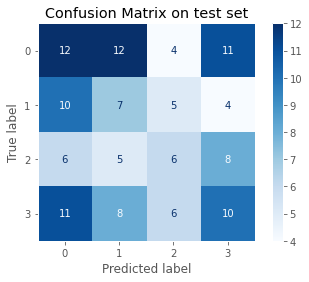

In [246]:
# Matriz de confusión
metrics.plot_confusion_matrix(Xgboost_model,XC3_test,YC3_test_encoded,cmap='Blues');
plt.grid(False)
plt.title('Confusion Matrix on test set');